In [1]:
#importação das bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
import geopandas as gpd

In [2]:
# Carregamento dos dados para análise da extrutura
base_tratada_caminho = '..\\Base de dados\\Base_tratada.csv'

# Leitura dos arquivos CSV de acidentes e empreendimentos
base_tratada_df = pd.read_csv(base_tratada_caminho)
pd.set_option('display.max_columns', None)
base_tratada_df

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\718623421.py:5: DtypeWarning: Columns (43,63) have mixed types. Specify dtype option on import or set low_memory=False.
  base_tratada_df = pd.read_csv(base_tratada_caminho)


Unnamed: 0    cod_mdr  cod_operacao  cod_saci  cod_convenio_siafi  \
0                0    1-38001      319910.0   38001.0                 0.0   
1                1    1-38001      319910.0   38001.0                 0.0   
2                2    1-38001      319910.0   38001.0                 0.0   
3                3    1-38001      319910.0   38001.0                 0.0   
4                4    1-38001      319910.0   38001.0                 0.0   
...            ...        ...           ...       ...                 ...   
376749      376749  2-0402954      402954.0       NaN                 0.0   
376750      376750  2-0402954      402954.0       NaN                 0.0   
376751      376751  2-0402954      402954.0       NaN                 0.0   
376752      376752  2-0402954      402954.0       NaN                 0.0   
376753      376753  2-0402954      402954.0       NaN                 0.0   

        cod_ag_operador           origem          dsc_concedente dsc_fonte  \
0              375658.0         PAC_MCID  MINISTERIO DAS CIDADES       FIN   
1              375658.0         PAC_MCID  MINISTERIO DAS CIDADES       FIN   
2              375658.0         PAC_MCID  MINISTERIO DAS CIDADES       FIN   
3              375658.0         PAC_MCID  MINISTERIO DAS CIDADES       FIN   
4              375658.0         PAC_MCID  MINISTERIO DAS CIDADES       FIN   
...                 ...              ...                     ...       ...   
376749              NaN  NPAC_DBGESTORES  MINISTERIO DAS CIDADES       OGU   
376750              NaN  NPAC_DBGESTORES  MINISTERIO DAS CIDADES       OGU   
376751              NaN  NPAC_DBGESTORES  MINISTERIO DAS CIDADES       OGU   
376752              NaN  NPAC_DBGESTORES  MINISTERIO DAS CIDADES       OGU   
376753              NaN  NPAC_DBGESTORES  MINISTERIO DAS CIDADES       OGU   

       dsc_unidade cod_proposta dsc_situacao_contrato_mdr bln_carteira_mdr  \
0            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
1            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
2            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
3            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
4            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
...            ...          ...                       ...              ...   
376749       SEMOB          NaN   CANCELADO OU DISTRATADO              NAO   
376750       SEMOB          NaN   CANCELADO OU DISTRATADO              NAO   
376751       SEMOB          NaN   CANCELADO OU DISTRATADO              NAO   
376752       SEMOB          NaN   CANCELADO OU DISTRATADO              NAO   
376753       SEMOB          NaN   CANCELADO OU DISTRATADO              NAO   

       bln_carteira_mdr_ativo dsc_situacao_objeto_mdr dsc_paralisada_mdr  \
0                         NAO               CONCLUIDA     NAO PARALISADA   
1                         NAO               CONCLUIDA     NAO PARALISADA   
2                         NAO               CONCLUIDA     NAO PARALISADA   
3                         NAO               CONCLUIDA     NAO PARALISADA   
4                         NAO               CONCLUIDA     NAO PARALISADA   
...                       ...                     ...                ...   
376749                    NAO            NAO INICIADA     NAO PARALISADA   
376750                    NAO            NAO INICIADA     NAO PARALISADA   
376751                    NAO            NAO INICIADA     NAO PARALISADA   
376752                    NAO            NAO INICIADA     NAO PARALISADA   
376753                    NAO            NAO INICIADA     NAO PARALISADA   

       bln_ativo bln_ativo_boolean  cod_id_fonte   cod_id_pac programa  acao  \
0              S                 Y        375658        38001  PAC FIN  FGTS   
1              S                 Y        375658        38001  PAC FIN  FGTS   
2              S                 Y        375658        

In [6]:
# Analisar estatísticas descritivas das variáveis numéricas
#Vale ressaltar que aqui é uma análise preliminar e que algumas métricas não devem ser analisadas como o 
# cod_saaci por ser um valor de identificação
descricao_df = base_tratada_df.describe()
descricao_df

Unnamed: 0   cod_operacao      cod_saci  cod_convenio_siafi  \
count  376754.000000  371123.000000  16571.000000       376754.000000   
mean   188376.500000  229743.500298  49155.421459       471588.080811   
std    108759.655996   96030.212170  15641.066443       278289.420174   
min         0.000000       0.000000      0.000000            0.000000   
25%     94188.250000  166697.000000  53150.000000       422214.000000   
50%    188376.500000  237031.000000  56038.000000       578122.000000   
75%    282564.750000  308226.500000  57269.000000       705588.000000   
max    376753.000000  603847.000000  58206.000000       781196.000000   

       cod_ag_operador   cod_id_fonte   Código IBGE  \
count     10291.000000  376754.000000  3.767540e+05   
mean     455398.528229  229344.749956  3.367638e+06   
std       69563.219055   99706.500380  9.668090e+05   
min      100394.000000   36595.000000  1.100015e+06   
25%      423784.000000  164110.000000  2.613503e+06   
50%      442376.000000  236861.000000  3.303856e+06   
75%      523295.000000  308210.000000  4.204202e+06   
max      611455.000000  611455.000000  5.300108e+06   

       vlr_repasse_financiamento  vlr_contrapartida  vlr_empenhado  \
count               3.767540e+05       3.767540e+05   2.829210e+05   
mean                2.842111e+06       1.208868e+06   2.915914e+05   
std                 6.722099e+07       5.580454e+07   1.024706e+06   
min                 0.000000e+00       0.000000e+00   0.000000e+00   
25%                 9.820000e+04       4.916000e+03   9.750000e+04   
50%                 1.500000e+05       1.323763e+04   1.365000e+05   
75%                 3.000000e+05       3.984507e+04   2.557400e+05   
max                 1.051140e+10       6.953356e+09   7.312500e+07   

       vlr_desembolsado  vlr_desbloqueado  vlr_desembolsado_19  \
count      2.699120e+05      2.512020e+05         5.010000e+03   
mean       1.171445e+06      1.214703e+06         3.933977e+06   
std        1.492984e+07      1.540051e+07         1.266023e+07   
min        0.000000e+00      0.000000e+00         0.000000e+00   
25%        9.750000e+04      9.740588e+04         2.023290e+05   
50%        1.462500e+05      1.406758e+05         6.691871e+05   
75%        2.953000e+05      2.903535e+05         2.654713e+06   
max        1.053887e+09      1.053887e+09         1.513233e+08   

       vlr_desembolsado_20  vlr_desembolsado_21     prc_fisico  \
count         5.441000e+03         3.371000e+03  310012.000000   
mean          3.785934e+06         3.114387e+06      83.361548   
std           1.011357e+07         1.031984e+07      36.705158   
min           1.000000e-02         1.157730e+03       0.000000   
25%           2.960000e+05         2.665284e+05     100.000000   
50%           1.020964e+06         8.976065e+05     100.000000   
75%           2.944208e+06         2.547513e+06     100.000000   
max           1.162307e+08         1.482982e+08     100.000000   

       vlr_ult_desembolso  vlr_ult_repasse_desbloqueado  \
count        2.485310e+05                  2.515320e+05   
mean         1.765710e+05                  6.880470e+04   
std          8.752129e+05                  2.015933e+05   
min          0.000000e+00                  0.000000e+00   
25%          3.900000e+04                  1.308451e+04   
50%          7.800000e+04                  3.772818e+04   
75%          1.367572e+05                  8.274537e+04   
max          5.856295e+07                  1.121973e+07   

       vlr_ult_contrapartida_desbloqueado  dias_paralisados  pop_beneficiada  \
count                        2.515320e+05     245831.000000     3.767540e+05   
mean                         1.184260e+04       4671.910735     3.533285e+03   
std                          1.883537e+05       1584.650303     8.356913e+04   
min                          0.000000e+00         18.000000     0.000000e+00   
25%                          0.000000e+00       3625.000000     1.220000e+02   
50%                    

- Em uma análise de correlação valores próximos a zero, indicam que não há correlação
- Valores próximos a 1 indicam correlação positiva, ou seja, quando o valor da variável 1 aumenta, o valor da variável 2 também aumenta
- Valores próximos a -1 indicam correlação negativa, , ou seja, quando o valor da variável 1 aumenta, o valor da variável 2 diminui

In [7]:
# Analisar a correlação entre variáveis de acidentes e empreendimentos com matriz de correlação
correlation_matrix = base_tratada_df.corr(numeric_only=True)
correlation_matrix

Unnamed: 0  cod_operacao  cod_saci  \
Unnamed: 0                         1.000000      0.065153  0.134541   
cod_operacao                       0.065153      1.000000 -0.371571   
cod_saci                           0.134541     -0.371571  1.000000   
cod_convenio_siafi                 0.223718      0.523098       NaN   
cod_ag_operador                    0.501558      0.818493  0.029832   
...                                     ...           ...       ...   
taxa_mun_motociclista_feridos     -0.199079      0.012006 -0.045252   
taxa_mun_automovel_feridos        -0.091402      0.031167 -0.011385   
taxa_mun_veiculo_pesado_feridos   -0.048490      0.013568  0.005430   
taxa_mun_onibus_feridos           -0.005541     -0.001054 -0.023973   
taxa_mun_outros_feridos           -0.112650      0.011766  0.004321   

                                 cod_convenio_siafi  cod_ag_operador  \
Unnamed: 0                                 0.223718         0.501558   
cod_operacao                               0.523098         0.818493   
cod_saci                                        NaN         0.029832   
cod_convenio_siafi                         1.000000              NaN   
cod_ag_operador                                 NaN         1.000000   
...                                             ...              ...   
taxa_mun_motociclista_feridos             -0.052438        -0.084935   
taxa_mun_automovel_feridos                -0.003773        -0.056829   
taxa_mun_veiculo_pesado_feridos           -0.002266        -0.045928   
taxa_mun_onibus_feridos                    0.002031        -0.038770   
taxa_mun_outros_feridos                   -0.021947        -0.081250   

                                 cod_id_fonte  Código IBGE  \
Unnamed: 0                           0.065983    -0.145743   
cod_operacao                         0.996194     0.095868   
cod_saci                            -0.274798     0.098648   
cod_convenio_siafi                   0.495794     0.074600   
cod_ag_operador                      1.000000     0.013016   
...                                       ...          ...   
taxa_mun_motociclista_feridos        0.013106    -0.033742   
taxa_mun_automovel_feridos           0.030105     0.042389   
taxa_mun_veiculo_pesado_feridos      0.013643     0.055016   
taxa_mun_onibus_feridos             -0.000919    -0.007397   
taxa_mun_outros_feridos              0.013129     0.027829   

                                 vlr_repasse_financiamento  vlr_contrapartida  \
Unnamed: 0                                       -0.061573          -0.034881   
cod_operacao                                      0.104361           0.048428   
cod_saci                                          0.054637           0.032802   
cod_convenio_siafi                               -0.063182          -0.035154   
cod_ag_operador                                  -0.145696          -0.133647   
...                                                    ...                ...   
taxa_mun_motociclista_feridos                     0.025448           0.010885   
taxa_mun_automovel_feridos                        0.011069           0.004909   
taxa_mun_veiculo_pesado_feridos                   0.005911           0.002542   
taxa_mun_onibus_feridos                           0.002710           0.001482   
taxa_mun_outros_feridos                           0.004877           0.001428   

                                 vlr_empenhado  vlr_desembolsado  \
Unnamed: 0                           -0.116506         -0.094901   
cod_operacao                          0.032043          0.109074   
cod_saci                                   NaN          0.015297   
cod_convenio_siafi                    0.032846         -0.144447   
cod_ag_operador                            NaN         -0.161950   
...                                        ...               ...   
taxa_mun_motociclista_feridos         0.105502          0.050236   
taxa_mun_automovel_feridos            0.026163       

In [9]:
# Selecionar variáveis de acidentes que podem ser impactadas pelos empreendimentos
accident_vars = ['Pedestre_mortes', 'Ciclista_mortes', 'Motociclista_mortes', 
                 'Ocup_triciclo_motor_mortes', 'Ocup_automovel_mortes', 'total_mortes']

# Filtrar as correlações apenas para variáveis de acidentes
correlation_with_accidents = correlation_matrix.loc[accident_vars]
correlation_with_accidents 

Unnamed: 0  cod_operacao  cod_saci  \
Pedestre_mortes              -0.213272      0.115964 -0.356571   
Ciclista_mortes              -0.266956      0.080055 -0.249940   
Motociclista_mortes          -0.258617      0.096151 -0.301187   
Ocup_triciclo_motor_mortes   -0.092181      0.024882 -0.107269   
Ocup_automovel_mortes        -0.288716      0.099854 -0.289077   
total_mortes                 -0.277708      0.115051 -0.349394   

                            cod_convenio_siafi  cod_ag_operador  cod_id_fonte  \
Pedestre_mortes                      -0.120979         0.100287      0.097298   
Ciclista_mortes                      -0.122071        -0.004596      0.071008   
Motociclista_mortes                  -0.128800         0.042970      0.085085   
Ocup_triciclo_motor_mortes           -0.040062         0.043594      0.020669   
Ocup_automovel_mortes                -0.125932         0.001909      0.086198   
total_mortes                         -0.136609         0.064456      0.097522   

                            Código IBGE  vlr_repasse_financiamento  \
Pedestre_mortes               -0.009459                   0.244119   
Ciclista_mortes                0.067286                   0.187170   
Motociclista_mortes           -0.009621                   0.214762   
Ocup_triciclo_motor_mortes    -0.009355                   0.039687   
Ocup_automovel_mortes          0.061407                   0.211465   
total_mortes                  -0.000273                   0.233574   

                            vlr_contrapartida  vlr_empenhado  \
Pedestre_mortes                      0.199585       0.227028   
Ciclista_mortes                      0.143485       0.225160   
Motociclista_mortes                  0.166236       0.266300   
Ocup_triciclo_motor_mortes           0.019825       0.059601   
Ocup_automovel_mortes                0.154821       0.233948   
total_mortes                         0.180071       0.264910   

                            vlr_desembolsado  vlr_desbloqueado  \
Pedestre_mortes                     0.267071          0.266791   
Ciclista_mortes                     0.198313          0.197307   
Motociclista_mortes                 0.218265          0.216643   
Ocup_triciclo_motor_mortes          0.077154          0.078549   
Ocup_automovel_mortes               0.251808          0.253147   
total_mortes                        0.274812          0.275028   

                            vlr_desembolsado_19  vlr_desembolsado_20  \
Pedestre_mortes                        0.336440             0.257867   
Ciclista_mortes                        0.269394             0.280680   
Motociclista_mortes                    0.281917             0.254744   
Ocup_triciclo_motor_mortes             0.068361             0.143343   
Ocup_automovel_mortes                  0.332404             0.307506   
total_mortes                           0.329625             0.279191   

                            vlr_desembolsado_21  prc_fisico  \
Pedestre_mortes                        0.200019   -0.058119   
Ciclista_mortes                        0.215482   -0.049173   
Motociclista_mortes                    0.181202   -0.056250   
Ocup_triciclo_motor_mortes             0.177727   -0.021853   
Ocup_automovel_mortes                  0.265044   -0.061235   
total_mortes                           0.222366   -0.065663   

                            vlr_ult_desembolso  vlr_ult_repasse_desbloqueado  \
Pedestre_mortes                       0.398608                      0.176779   
Ciclista_mortes                       0.347564                      0.138999   
Motociclista_mortes                   0.379879                      0.172788   
Ocup_triciclo_motor_mortes            0.102344                      0.035275   
Ocup_automovel_mortes                 0.375795                      0.159523   
total_mortes                          0.411862                      0.180960   

                            vlr_ult_contrapartida_desbloqueado  \
Pedestre_mortes     

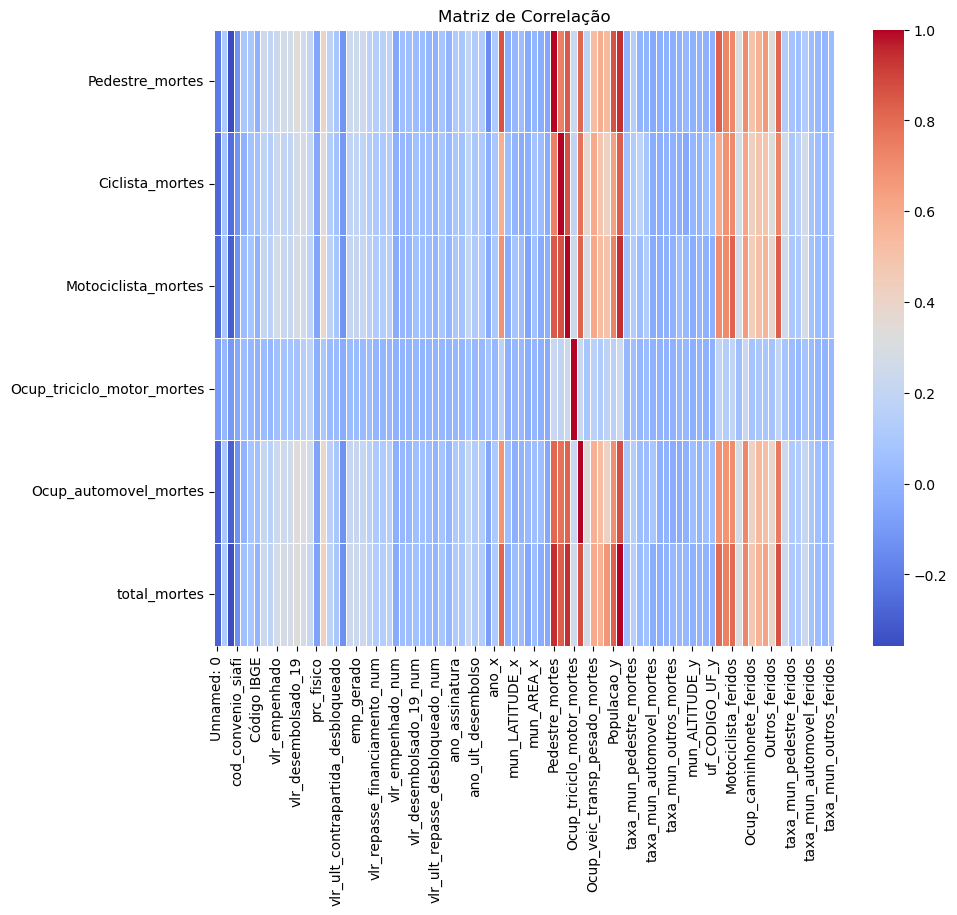

In [10]:
# Gerar o mapa de calor da matriz de correlação
#vale destacar que essa é a correlação geral e que algumas variáveis não fazem sentido esterem correlacionadas
#como o código_IBGE por exemplo
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_accidents, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

C:\Users\kaiog\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


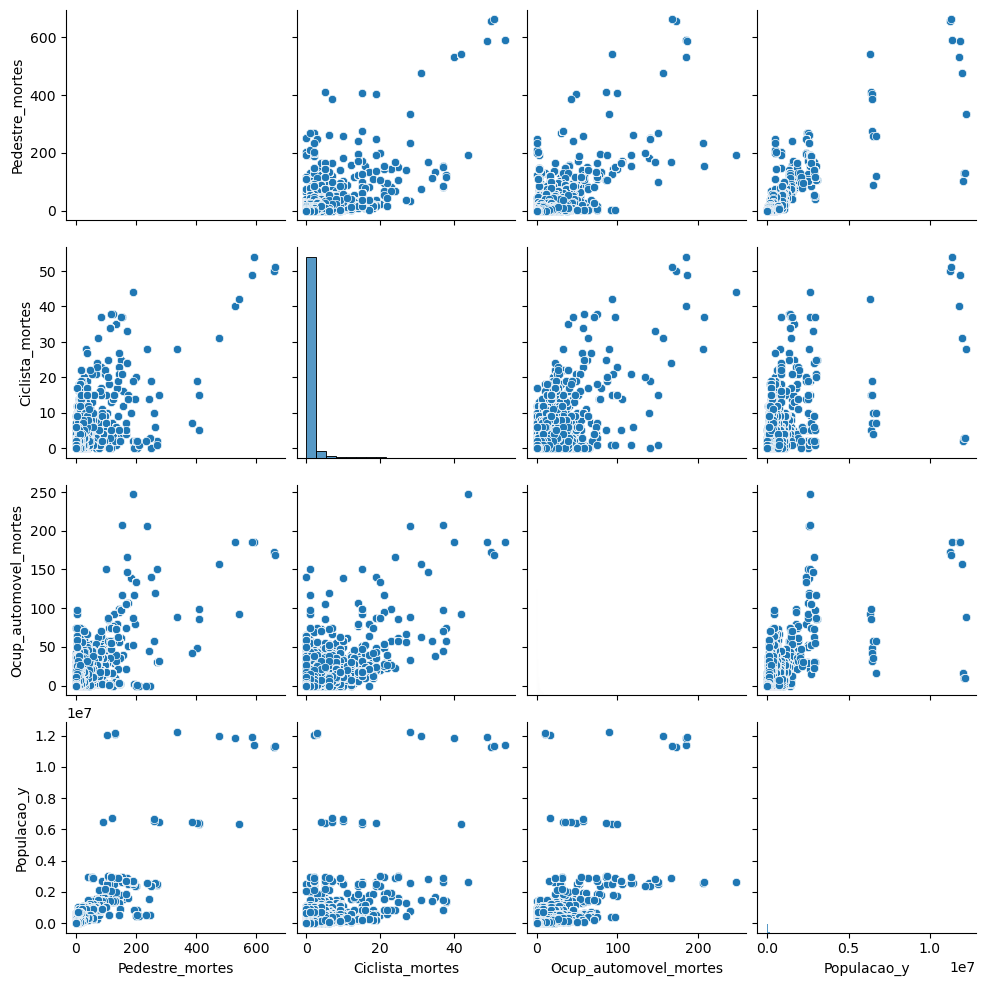

In [50]:
# Selecionar algumas colunas
selected_columns = base_tratada_df[['Pedestre_mortes', 'Ciclista_mortes', 'Ocup_automovel_mortes', 'Populacao_y']]  # Substitua pelos nomes das suas colunas

# Criar a matriz de pair plots
sns.pairplot(selected_columns)

# Mostrar o gráfico
plt.show()

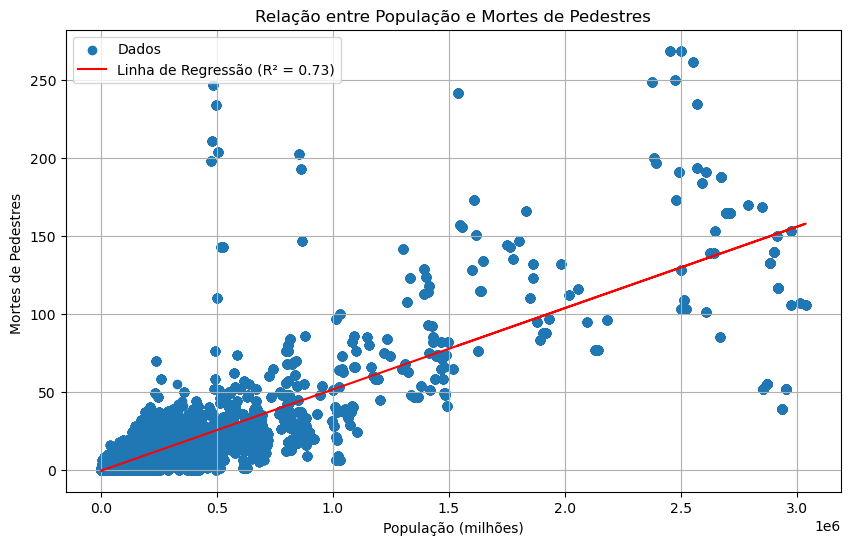

In [37]:
#filtrar para melhor visibildiade do eixo x
filtro = (base_tratada_df['Populacao_y'] < 6000000)
df_filtrado = base_tratada_df.loc[filtro]

# Realizar regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df_filtrado['Populacao_y'], df_filtrado['Pedestre_mortes'])

# Calcular valores de y baseados na regressão para plotar a linha
line = slope * df_filtrado['Populacao_y'] + intercept

# Gráfico de dispersão entre mortes de pedestres e população
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['Populacao_y'], df_filtrado['Pedestre_mortes'],label='Dados')
plt.plot(df_filtrado['Populacao_y'], line, color='red', label=f'Linha de Regressão (R² = {r_value**2:.2f})')  # R² formatado
plt.xlabel('População (milhões)')
plt.ylabel('Mortes de Pedestres ')
plt.title('Relação entre População e Mortes de Pedestres')
plt.legend()
plt.grid(True)
plt.show()

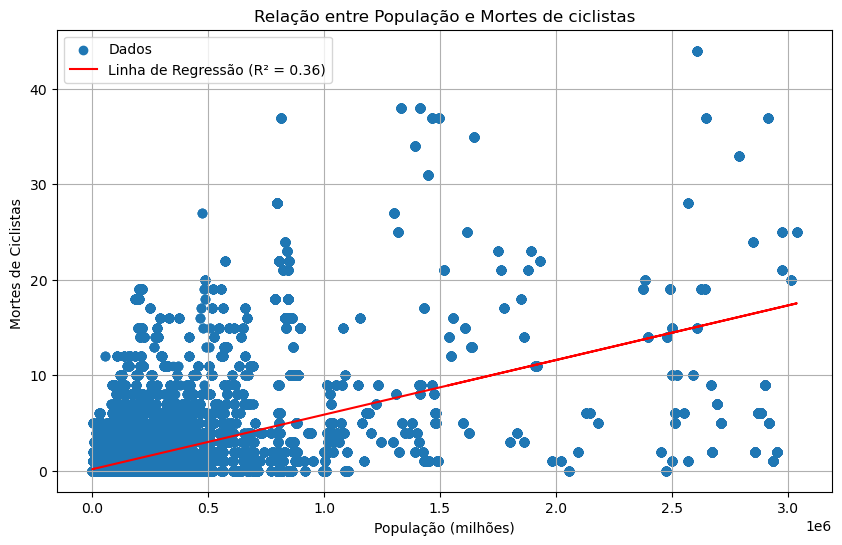

In [38]:
#filtrar para melhor visibildiade do eixo x
filtro = (base_tratada_df['Populacao_y'] < 6000000)
df_filtrado = base_tratada_df.loc[filtro]

# Realizar regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df_filtrado['Populacao_y'], df_filtrado['Ciclista_mortes'])

# Calcular valores de y baseados na regressão para plotar a linha
line = slope * df_filtrado['Populacao_y'] + intercept

# Gráfico de dispersão entre mortes de pedestres e população
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['Populacao_y'], df_filtrado['Ciclista_mortes'],label='Dados')
plt.plot(df_filtrado['Populacao_y'], line, color='red', label=f'Linha de Regressão (R² = {r_value**2:.2f})')  # R² formatado
plt.xlabel('População (milhões)')
plt.ylabel('Mortes de Ciclistas ')
plt.title('Relação entre População e Mortes de ciclistas')
plt.legend()
plt.grid(True)
plt.show()

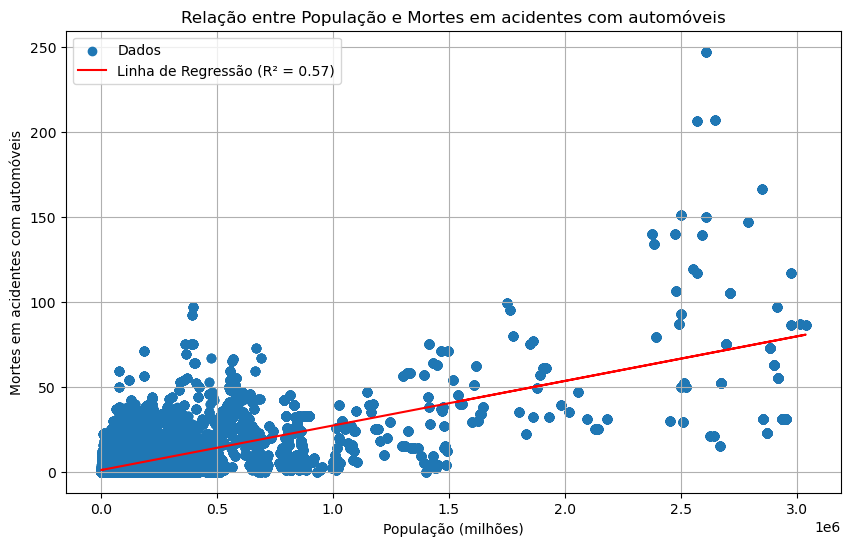

In [39]:
#filtrar para melhor visibildiade do eixo x
filtro = (base_tratada_df['Populacao_y'] < 6000000)
df_filtrado = base_tratada_df.loc[filtro]

# Realizar regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df_filtrado['Populacao_y'], df_filtrado['Ocup_automovel_mortes'])

# Calcular valores de y baseados na regressão para plotar a linha
line = slope * df_filtrado['Populacao_y'] + intercept

# Gráfico de dispersão entre mortes de pedestres e população
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['Populacao_y'], df_filtrado['Ocup_automovel_mortes'],label='Dados')
plt.plot(df_filtrado['Populacao_y'], line, color='red', label=f'Linha de Regressão (R² = {r_value**2:.2f})')  # R² formatado
plt.xlabel('População (milhões)')
plt.ylabel('Mortes em acidentes com automóveis')
plt.title('Relação entre População e Mortes em acidentes com automóveis')
plt.legend()
plt.grid(True)
plt.show()

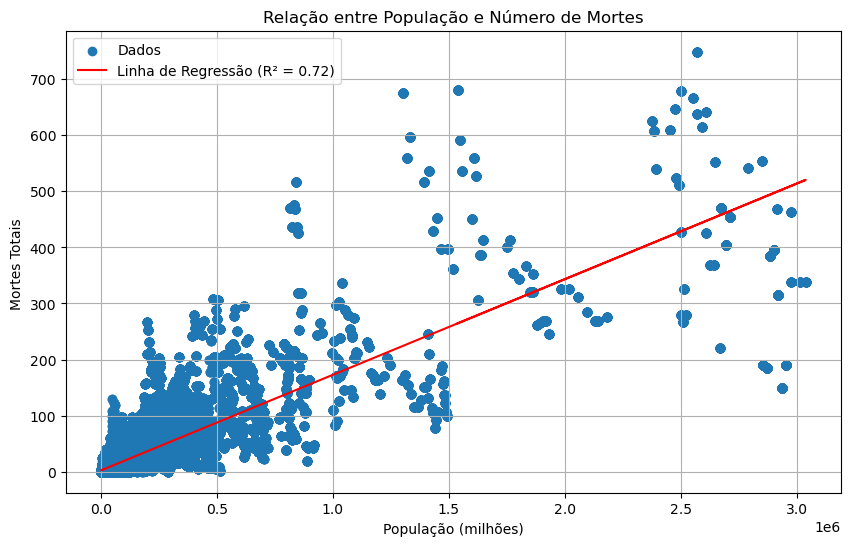

In [40]:
#filtrar para melhor visibildiade do eixo x
filtro = (base_tratada_df['Populacao_y'] < 6000000)
df_filtrado = base_tratada_df.loc[filtro]

# Realizar regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df_filtrado['Populacao_y'], df_filtrado['total_mortes'])

# Calcular valores de y baseados na regressão para plotar a linha
line = slope * df_filtrado['Populacao_y'] + intercept

# Gráfico de dispersão entre mortes de pedestres e população
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['Populacao_y'], df_filtrado['total_mortes'],label='Dados')
plt.plot(df_filtrado['Populacao_y'], line, color='red', label=f'Linha de Regressão (R² = {r_value**2:.2f})')  # R² formatado
plt.xlabel('População (milhões)')
plt.ylabel('Mortes Totais ')
plt.title('Relação entre População e Número de Mortes')
plt.legend()
plt.grid(True)
plt.show()

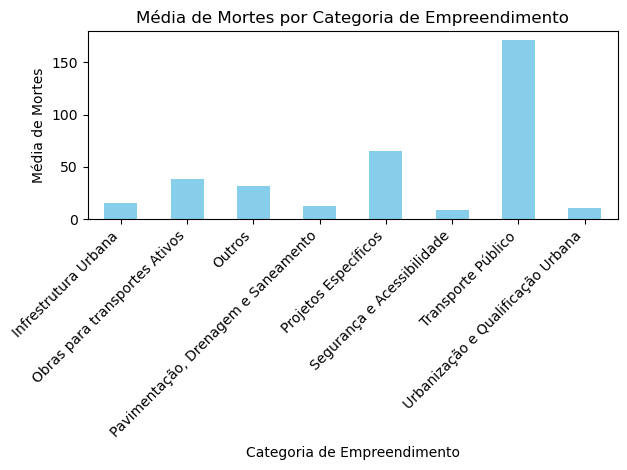

In [42]:
# calculando a média de mortes por empreendimento
media_mortes_por_categoria = base_tratada_df.groupby('Categoria_emprendimentos')['total_mortes'].mean()

# Plotando o gráfico de barras
media_mortes_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Média de Mortes por Categoria de Empreendimento')
plt.xlabel('Categoria de Empreendimento')
plt.ylabel('Média de Mortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

C:\Users\kaiog\AppData\Local\Temp\ipykernel_36352\422523194.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


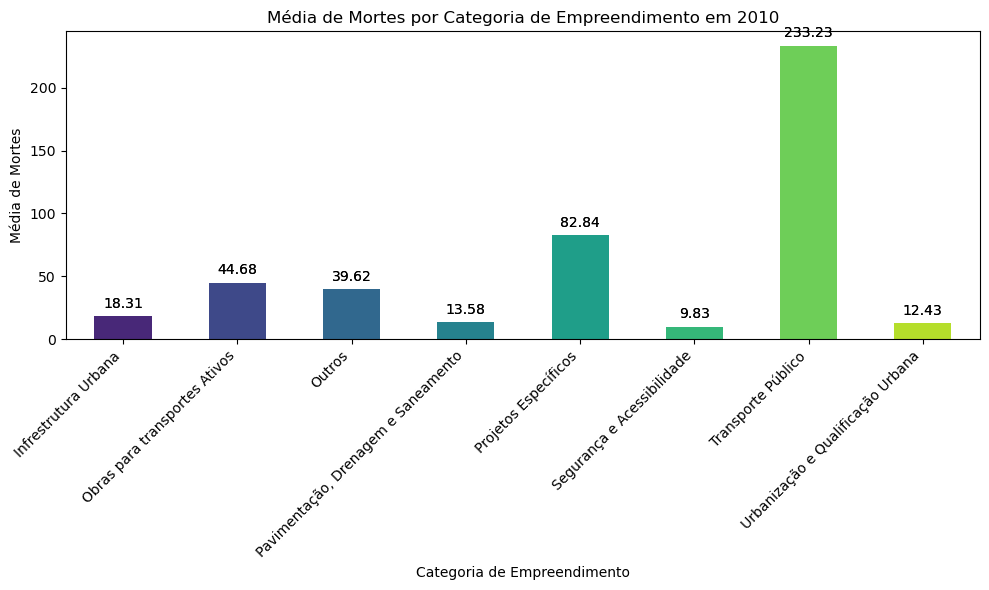

C:\Users\kaiog\AppData\Local\Temp\ipykernel_36352\422523194.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


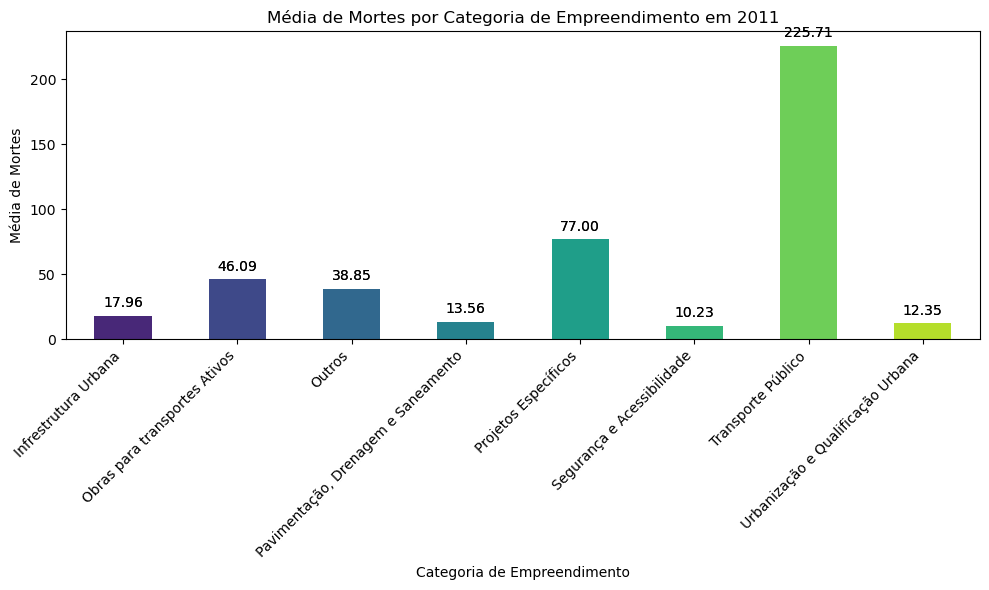

C:\Users\kaiog\AppData\Local\Temp\ipykernel_36352\422523194.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


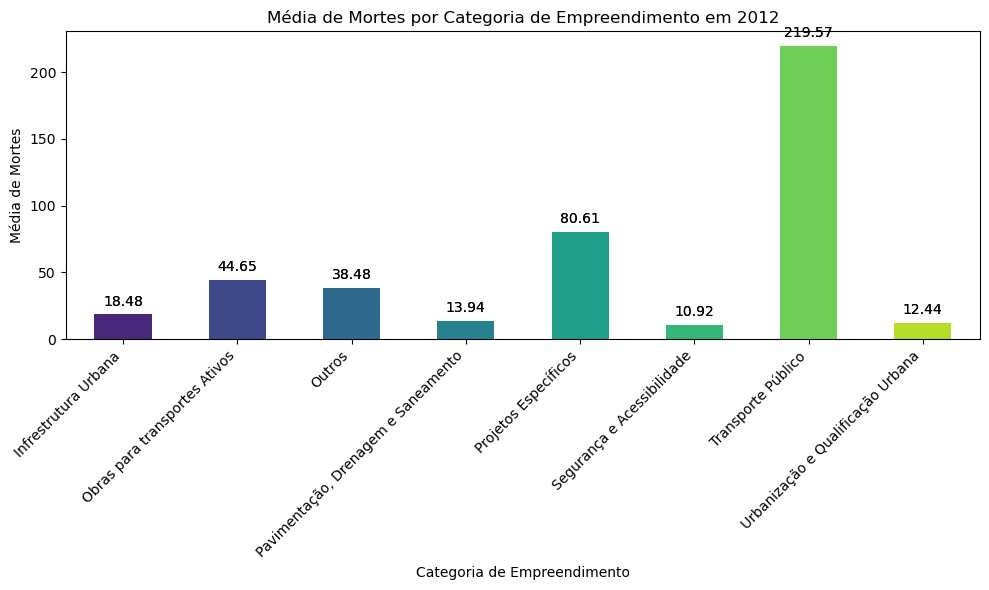

C:\Users\kaiog\AppData\Local\Temp\ipykernel_36352\422523194.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


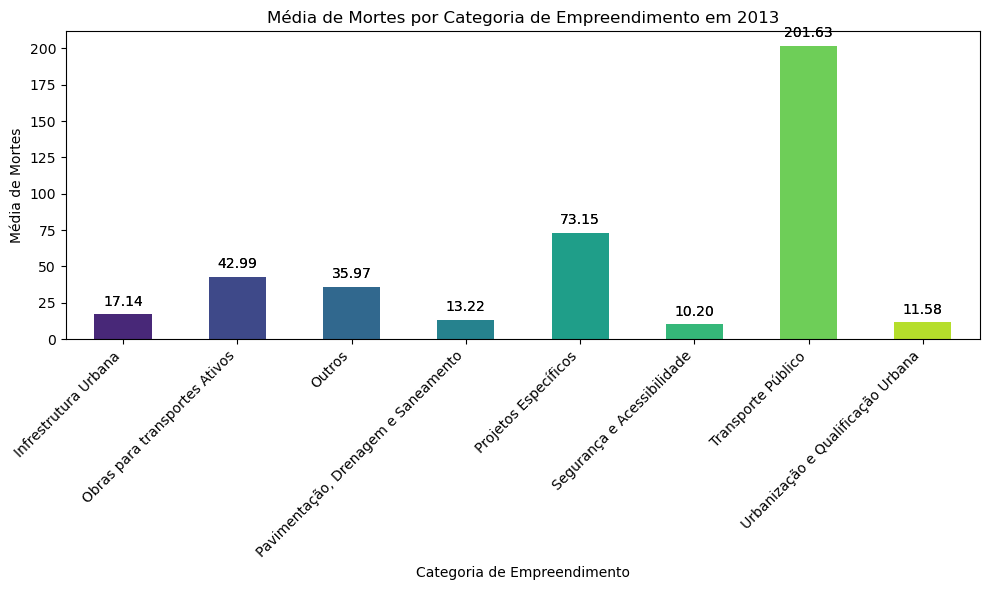

C:\Users\kaiog\AppData\Local\Temp\ipykernel_36352\422523194.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


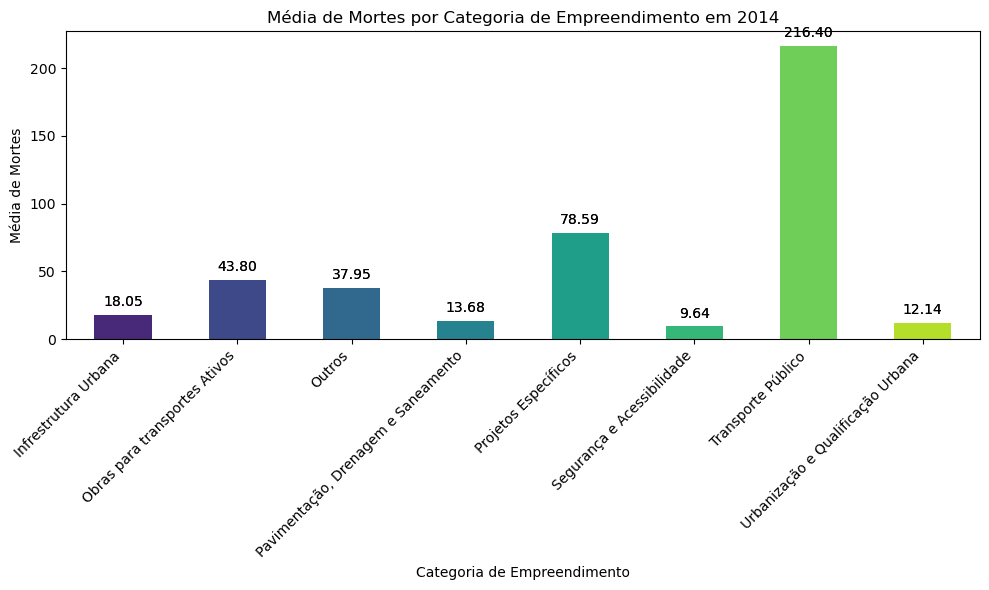

C:\Users\kaiog\AppData\Local\Temp\ipykernel_36352\422523194.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


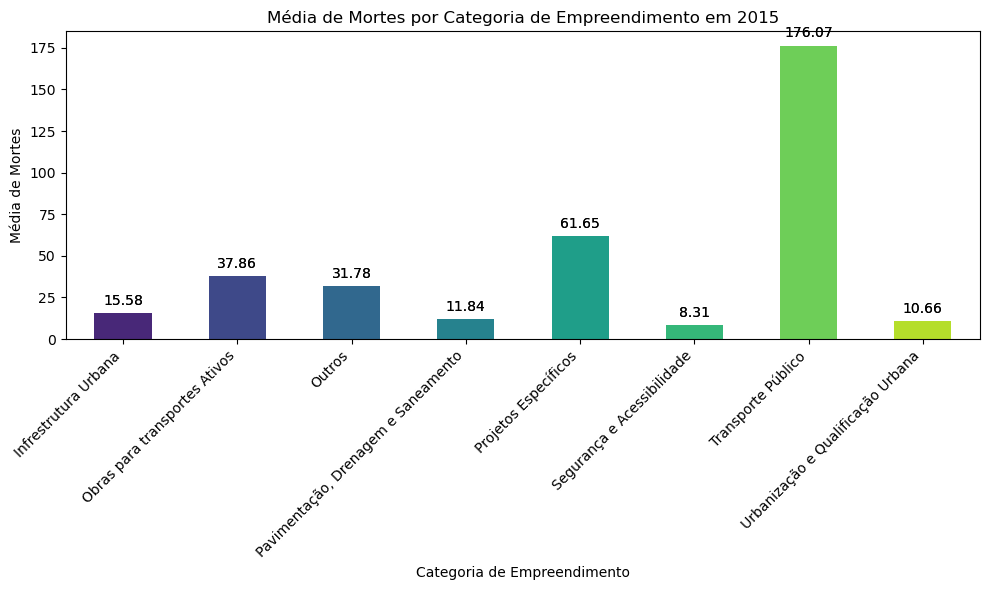

C:\Users\kaiog\AppData\Local\Temp\ipykernel_36352\422523194.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


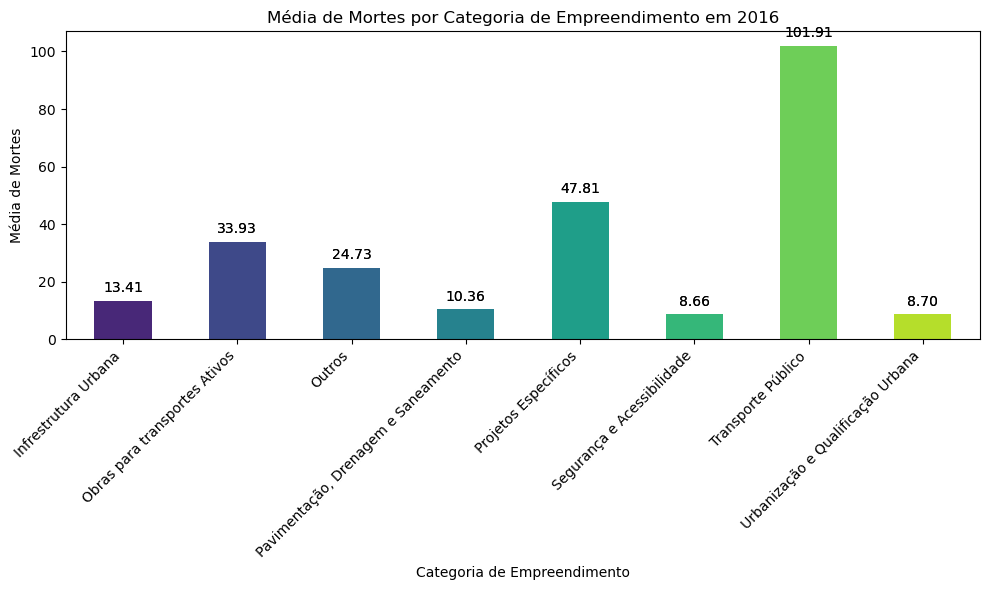

C:\Users\kaiog\AppData\Local\Temp\ipykernel_36352\422523194.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


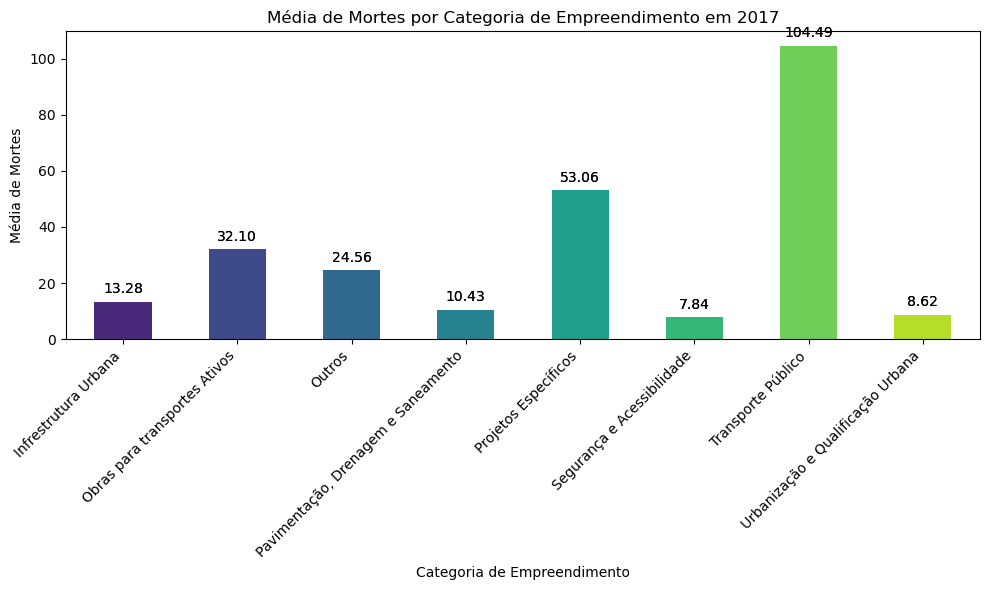

C:\Users\kaiog\AppData\Local\Temp\ipykernel_36352\422523194.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


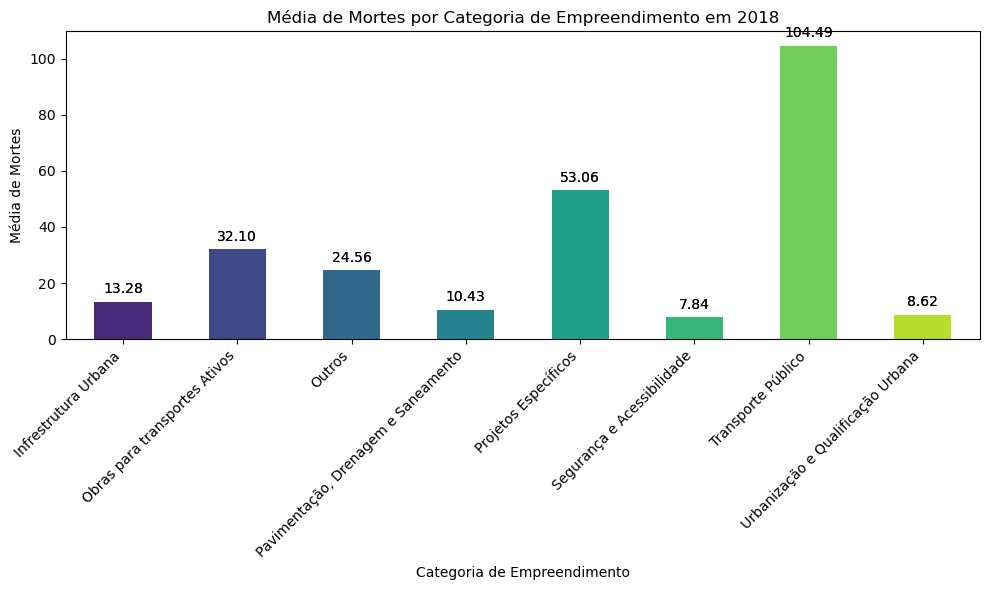

C:\Users\kaiog\AppData\Local\Temp\ipykernel_36352\422523194.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


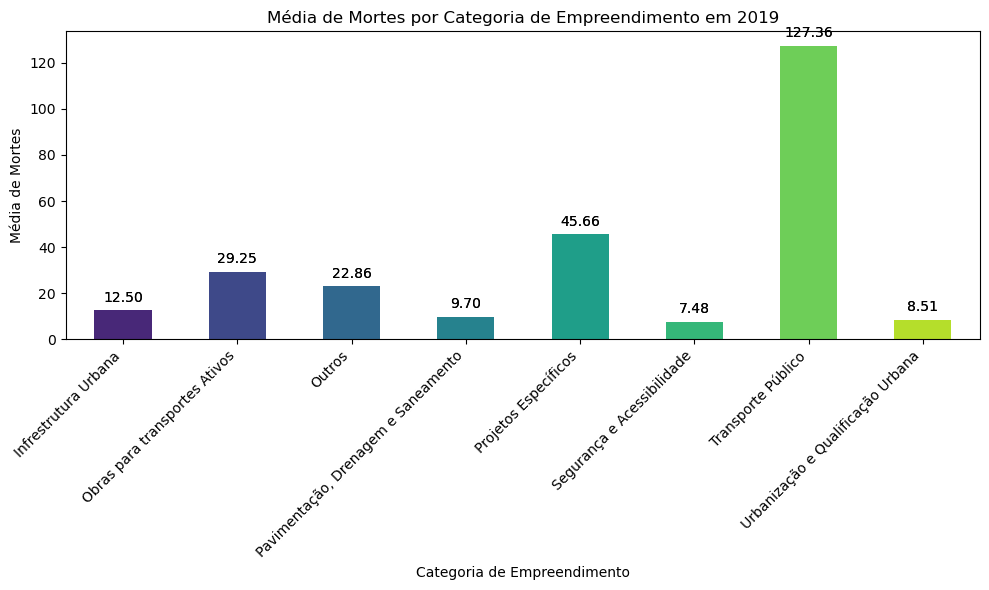

In [47]:
# Agrupar por categoria e ano, e calcular a média de mortes
media_mortes_por_categoria_ano = base_tratada_df.groupby(['Categoria_emprendimentos', 'ano_y'])['total_mortes'].mean().unstack()

# Plotar um gráfico para cada ano
for ano in media_mortes_por_categoria_ano.columns:
    plt.figure(figsize=(10, 6))
    ax = media_mortes_por_categoria_ano[ano].plot(kind='bar', color=sns.color_palette("viridis", len(media_mortes_por_categoria_ano)), figsize=(10, 6))
    media_mortes_por_categoria_ano[ano].plot(kind='bar', color=sns.color_palette("viridis", len(media_mortes_por_categoria_ano)))
    plt.title(f'Média de Mortes por Categoria de Empreendimento em {ano}')
    plt.xlabel('Categoria de Empreendimento')
    plt.ylabel('Média de Mortes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # Adicionando os valores nas barras
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    plt.tight_layout()
    
    plt.show()

In [72]:
#agrupar nome do município e UF
base_tratada_df['Municipio_UF'] = base_tratada_df['Município_x'] + " (" + base_tratada_df['uf_NOME_UF_x'] + ")"

# Calcular a média de mortes por município e ano
df_agrupado = base_tratada_df.groupby(['Municipio_UF', 'ano_y'])['total_mortes'].mean().reset_index()

# Pivotar os dados para ter anos como colunas
pivot_df = df_agrupado.pivot(index='Municipio_UF', columns='ano_y', values='total_mortes')

# Calcular a média geral de mortes por município
pivot_df['Média Total de Mortes por ano'] = pivot_df.mean(axis=1)

# Ordenar os municípios pela média total de mortes e pegar os top 10
top_municipios = pivot_df.sort_values(by='Média Total de Mortes por ano', ascending=False).head(20)
top_municipios

ano_y                              2010    2011    2012    2013    2014  \
Municipio_UF                                                              
São Paulo (SAO PAULO)            1459.0  1471.0  1347.0  1225.0  1315.0   
Rio de Janeiro (RIO DE JANEIRO)   990.0   819.0  1066.0   952.0  1044.0   
Fortaleza (CEARA)                 609.0   647.0   679.0   667.0   749.0   
Goiânia (GOIAS)                   675.0   559.0   597.0   516.0   536.0   
Brasília (DISTRITO FEDERAL)       638.0   642.0   553.0   542.0   555.0   
Recife (PERNAMBUCO)               680.0   591.0   537.0   451.0   560.0   
Belo Horizonte (MINAS GERAIS)     625.0   608.0   540.0   524.0   512.0   
Teresina (PIAUI)                  471.0   437.0   475.0   468.0   516.0   
Curitiba (PARANA)                 401.0   414.0   355.0   320.0   353.0   
Salvador (BAHIA)                  470.0   405.0   454.0   385.0   396.0   
Manaus (AMAZONAS)                 344.0   366.0   321.0   326.0   325.0   
São Luís (MARANHAO)               297.0   302.0   336.0   288.0   279.0   
Ananindeua (PARA)                 235.0   254.0   308.0   288.0   273.0   
Aracaju (SERGIPE)                 278.0   290.0   251.0   295.0   231.0   
Campina Grande (PARAIBA)          189.0   181.0   242.0   280.0   257.0   
Maceió (ALAGOAS)                  244.0   266.0   247.0   212.0   234.0   
Sobral (CEARA)                    157.0   119.0   158.0   210.0   267.0   
João Pessoa (PARAIBA)             226.0   191.0   213.0   202.0   198.0   
Campinas (SAO PAULO)              244.0   275.0   213.0   231.0   223.0   
Cuiabá (MATO GROSSO)              207.0   223.0   198.0   227.0   220.0   

ano_y                              2015   2016   2017   2018   2019  \
Municipio_UF                                                          
São Paulo (SAO PAULO)            1082.0  318.0  295.0  295.0  762.0   
Rio de Janeiro (RIO DE JANEIRO)   610.0  228.0  628.0  628.0  385.0   
Fortaleza (CEARA)                 614.0  426.0  368.0  368.0  220.0   
Goiânia (GOIAS)                   430.0  452.0  398.0  398.0  361.0   
Brasília (DISTRITO FEDERAL)       469.0  464.0  339.0  339.0  338.0   
Recife (PERNAMBUCO)               527.0  307.0  386.0  386.0  414.0   
Belo Horizonte (MINAS GERAIS)     428.0  325.0  279.0  279.0  267.0   
Teresina (PIAUI)                  436.0  425.0  318.0  318.0  288.0   
Curitiba (PARANA)                 262.0  266.0  268.0  268.0  246.0   
Salvador (BAHIA)                  316.0  149.0  191.0  191.0  185.0   
Manaus (AMAZONAS)                 311.0  284.0  269.0  269.0  276.0   
São Luís (MARANHAO)               255.0  241.0  202.0  202.0  212.0   
Ananindeua (PARA)                 306.0  254.0  194.0  194.0  208.0   
Aracaju (SERGIPE)                 236.0  186.0  180.0  180.0  168.0   
Campina Grande (PARAIBA)          269.0  246.0  206.0  206.0  179.0   
Maceió (ALAGOAS)                  203.0  199.0  171.0  171.0  168.0   
Sobral (CEARA)                    253.0  252.0  232.0  232.0  214.0   
João Pessoa (PARAIBA)             191.0  221.0  191.0  191.0  185.0   
Campinas (SAO PAULO)              176.0  173.0  164.0  164.0  139.0   
Cuiabá (MATO GROSSO)              190.0  181.0  191.0  191.0  145.0   

ano_y                            Média Total de Mortes por ano  
Municipio_UF                                                    
São Paulo (SAO PAULO)                                    956.9  
Rio de Janeiro (RIO DE JANEIRO)                          735.0  
Fortaleza (CEARA)                                        534.7  
Goiânia (GOIAS)                                          492.2  
Brasília (DISTRITO FEDERAL)                              487.9  
Recife (PERNAMBUCO)                                      483.9  
Belo Horizonte (MINAS GERAIS)                            438.7  
Teresina (PIAUI)                                         415.2  
Curitiba (PARANA)                                        315.3  
Salvador (BAHIA)                                         314.2  
Manaus

In [73]:
#agrupar nome do município e UF
base_tratada_df['Municipio_UF'] = base_tratada_df['Município_x'] + " (" + base_tratada_df['uf_NOME_UF_x'] + ")"

# Calcular a média de mortes por município e ano
df_agrupado = base_tratada_df.groupby(['Municipio_UF', 'ano_y'])['Ocup_automovel_mortes'].mean().reset_index()

# Pivotar os dados para ter anos como colunas
pivot_df = df_agrupado.pivot(index='Municipio_UF', columns='ano_y', values='Ocup_automovel_mortes')

# Calcular a média geral de mortes por município
pivot_df['Média Total de Mortes por veículo'] = pivot_df.mean(axis=1)

# Ordenar os municípios pela média total de mortes e pegar os top 10
top_municipios = pivot_df.sort_values(by='Média Total de Mortes por veículo', ascending=False).head(20)
top_municipios

ano_y                                    2010   2011   2012   2013   2014  \
Municipio_UF                                                                
Brasília (DISTRITO FEDERAL)             206.0  247.0  207.0  147.0  166.0   
São Paulo (SAO PAULO)                   173.0  168.0  185.0  185.0  186.0   
Fortaleza (CEARA)                        30.0  140.0  151.0  119.0  117.0   
Belo Horizonte (MINAS GERAIS)           140.0  134.0   79.0  106.0   87.0   
Montes Claros (MINAS GERAIS)             75.0   69.0   55.0   75.0   92.0   
Curitiba (PARANA)                        99.0   95.0   80.0   75.0   77.0   
Goiânia (GOIAS)                          56.0   58.0   58.0   57.0   75.0   
Rio de Janeiro (RIO DE JANEIRO)          93.0   99.0   86.0   49.0   42.0   
Salvador (BAHIA)                         52.0   75.0  105.0   73.0   63.0   
Campos dos Goytacazes (RIO DE JANEIRO)   53.0   40.0   67.0   47.0   42.0   
Recife (PERNAMBUCO)                      45.0   40.0   40.0   29.0   51.0   
Cuiabá (MATO GROSSO)                     50.0   54.0   25.0   34.0   51.0   
Uberlândia (MINAS GERAIS)                36.0   22.0   14.0    7.0   17.0   
Feira de Santana (BAHIA)                 59.0   65.0   66.0   47.0   32.0   
Cascavel (PARANA)                        38.0   37.0   43.0   44.0   37.0   
Serra (ESPIRITO SANTO)                   37.0   44.0   50.0   46.0   46.0   
Itabuna (BAHIA)                          21.0   27.0   32.0   44.0   43.0   
Contagem (MINAS GERAIS)                  45.0   42.0   35.0   31.0   46.0   
Manaus (AMAZONAS)                        35.0   22.0   32.0   39.0   35.0   
Campo Grande (MATO GROSSO DO SUL)        42.0   33.0   23.0   39.0   30.0   

ano_y                                    2015   2016  2017  2018  2019  \
Municipio_UF                                                             
Brasília (DISTRITO FEDERAL)              97.0  117.0  86.0  86.0  87.0   
São Paulo (SAO PAULO)                   157.0   16.0  10.0  10.0  89.0   
Fortaleza (CEARA)                       139.0  150.0  21.0  21.0  15.0   
Belo Horizonte (MINAS GERAIS)            93.0   52.0  50.0  50.0  29.0   
Montes Claros (MINAS GERAIS)             97.0   75.0  64.0  64.0  52.0   
Curitiba (PARANA)                        49.0   57.0  61.0  61.0  32.0   
Goiânia (GOIAS)                          64.0   63.0  71.0  71.0  54.0   
Rio de Janeiro (RIO DE JANEIRO)          32.0   35.0  57.0  57.0  16.0   
Salvador (BAHIA)                         55.0   31.0  31.0  31.0  23.0   
Campos dos Goytacazes (RIO DE JANEIRO)   44.0   42.0  28.0  28.0  23.0   
Recife (PERNAMBUCO)                      62.0   30.0  34.0  34.0  38.0   
Cuiabá (MATO GROSSO)                     55.0   40.0  35.0  35.0  21.0   
Uberlândia (MINAS GERAIS)                59.0   73.0  43.0  43.0  67.0   
Feira de Santana (BAHIA)                 20.0   10.0  22.0  22.0  17.0   
Cascavel (PARANA)                        35.0   26.0  23.0  23.0  36.0   
Serra (ESPIRITO SANTO)                   29.0   21.0  16.0  16.0  27.0   
Itabuna (BAHIA)                          31.0   36.0  40.0  40.0  14.0   
Contagem (MINAS GERAIS)                  41.0   16.0  25.0  25.0  20.0   
Manaus (AMAZONAS)                        47.0   31.0  25.0  25.0  31.0   
Campo Grande (MATO GROSSO DO SUL)        33.0   18.0  33.0  33.0  33.0   

ano_y                                   Média Total de Mortes por veículo  
Municipio_UF                                                               
Brasília (DISTRITO FEDERAL)                                         144.6  
São Paulo (SAO PAULO)                                               117.9  
Fortaleza (CEARA)                                                    90.3  
Belo Horizonte (MINAS GERAIS)                                        82.0  
Montes Claros (MINAS GERAIS)                                         71.8  
Curitiba (PARANA)                                                    68.6  
Goiânia (GOIAS)                                                     

In [74]:
#agrupar nome do município e UF
base_tratada_df['Municipio_UF'] = base_tratada_df['Município_x'] + " (" + base_tratada_df['uf_NOME_UF_x'] + ")"

# Calcular a média de mortes por município e ano
df_agrupado = base_tratada_df.groupby(['Municipio_UF', 'ano_y'])['Pedestre_mortes'].mean().reset_index()

# Pivotar os dados para ter anos como colunas
pivot_df = df_agrupado.pivot(index='Municipio_UF', columns='ano_y', values='Pedestre_mortes')

# Calcular a média geral de mortes por município
pivot_df['Média Total de Mortes de pedestres'] = pivot_df.mean(axis=1)

# Ordenar os municípios pela média total de mortes e pegar os top 10
top_municipios = pivot_df.sort_values(by='Média Total de Mortes de pedestres', ascending=False).head(20)
top_municipios

ano_y                              2010   2011   2012   2013   2014   2015  \
Municipio_UF                                                                 
São Paulo (SAO PAULO)             657.0  661.0  591.0  530.0  585.0  476.0   
Rio de Janeiro (RIO DE JANEIRO)   542.0  408.0  409.0  404.0  387.0  277.0   
Fortaleza (CEARA)                 269.0  250.0  269.0  262.0  194.0  184.0   
Ananindeua (PARA)                 198.0  211.0  247.0  234.0  110.0  204.0   
Belo Horizonte (MINAS GERAIS)     249.0  200.0  197.0  173.0  191.0  128.0   
Brasília (DISTRITO FEDERAL)       235.0  191.0  153.0  170.0  169.0  150.0   
Recife (PERNAMBUCO)               242.0  157.0  156.0  128.0  173.0  151.0   
Manaus (AMAZONAS)                 147.0  166.0  132.0  132.0  112.0  116.0   
Curitiba (PARANA)                 144.0  143.0  135.0  110.0  123.0   95.0   
Salvador (BAHIA)                  188.0  165.0  165.0  133.0  140.0  117.0   
Goiânia (GOIAS)                   142.0  108.0  123.0  113.0  118.0   82.0   
Belém (PARA)                      129.0  124.0  114.0   92.0   85.0   58.0   
Duque de Caxias (RIO DE JANEIRO)  203.0  193.0  147.0   55.0   86.0   33.0   
Campinas (SAO PAULO)               82.0   86.0   76.0   85.0   80.0   66.0   
Porto Alegre (RIO GRANDE DO SUL)   93.0   75.0   51.0   65.0   71.0   58.0   
Guarulhos (SAO PAULO)              75.0   84.0   73.0   65.0   68.0   63.0   
Teresina (PIAUI)                   84.0   68.0   69.0   61.0   70.0   54.0   
São Luís (MARANHAO)                97.0   64.0   73.0   39.0   33.0   29.0   
São Gonçalo (RIO DE JANEIRO)       51.0   40.0   37.0   53.0  100.0   65.0   
Nova Iguaçu (RIO DE JANEIRO)       56.0   76.0   68.0   57.0   76.0   80.0   

ano_y                              2016   2017   2018   2019  \
Municipio_UF                                                   
São Paulo (SAO PAULO)             103.0  131.0  131.0  335.0   
Rio de Janeiro (RIO DE JANEIRO)    90.0  260.0  260.0  120.0   
Fortaleza (CEARA)                 101.0  139.0  139.0   85.0   
Ananindeua (PARA)                  43.0  143.0  143.0   47.0   
Belo Horizonte (MINAS GERAIS)     109.0  103.0  103.0  103.0   
Brasília (DISTRITO FEDERAL)       153.0  106.0  106.0  107.0   
Recife (PERNAMBUCO)                76.0  115.0  115.0  134.0   
Manaus (AMAZONAS)                  95.0   77.0   77.0   96.0   
Curitiba (PARANA)                  83.0   88.0   88.0   97.0   
Salvador (BAHIA)                   39.0   52.0   52.0   55.0   
Goiânia (GOIAS)                    74.0   82.0   82.0   65.0   
Belém (PARA)                       73.0   74.0   74.0   41.0   
Duque de Caxias (RIO DE JANEIRO)    9.0   20.0   20.0   20.0   
Campinas (SAO PAULO)               60.0   58.0   58.0   45.0   
Porto Alegre (RIO GRANDE DO SUL)   66.0   49.0   49.0   48.0   
Guarulhos (SAO PAULO)              48.0   47.0   47.0   54.0   
Teresina (PIAUI)                   45.0   37.0   37.0   32.0   
São Luís (MARANHAO)                41.0   66.0   66.0   24.0   
São Gonçalo (RIO DE JANEIRO)       63.0   37.0   37.0   40.0   
Nova Iguaçu (RIO DE JANEIRO)       12.0   32.0   32.0   13.0   

ano_y                             Média Total de Mortes de pedestres  
Municipio_UF                                                          
São Paulo (SAO PAULO)                                          420.0  
Rio de Janeiro (RIO DE JANEIRO)                                315.7  
Fortaleza (CEARA)                                              189.2  
Ananindeua (PARA)                                              158.0  
Belo Horizonte (MINAS GERAIS)                                  155.6  
Brasília (DISTRITO FEDERAL)                                    154.0  
Recife (PERNAMBUCO)                                            144.7  
Manaus (AMAZONAS)                                              115.0  
Curitiba (PARANA)                                              110.6  
Salvador (BAHIA)                                               110.6  
Goiânia (GOIAS)       

In [75]:
#agrupar nome do município e UF
base_tratada_df['Municipio_UF'] = base_tratada_df['Município_x'] + " (" + base_tratada_df['uf_NOME_UF_x'] + ")"

# Calcular a média de mortes por município e ano
df_agrupado = base_tratada_df.groupby(['Municipio_UF', 'ano_y'])['Ciclista_mortes'].mean().reset_index()

# Pivotar os dados para ter anos como colunas
pivot_df = df_agrupado.pivot(index='Municipio_UF', columns='ano_y', values='Ciclista_mortes')

# Calcular a média geral de mortes por município
pivot_df['Média Total de Mortes de ciclistas'] = pivot_df.mean(axis=1)

# Ordenar os municípios pela média total de mortes e pegar os top 10
top_municipios = pivot_df.sort_values(by='Média Total de Mortes de ciclistas', ascending=False).head(20)
top_municipios

ano_y                                   2010  2011  2012  2013  2014  2015  \
Municipio_UF                                                                 
São Paulo (SAO PAULO)                   50.0  51.0  54.0  40.0  49.0  31.0   
Goiânia (GOIAS)                         27.0  25.0  38.0  34.0  38.0  17.0   
Brasília (DISTRITO FEDERAL)             28.0  44.0  37.0  33.0  24.0  37.0   
Teresina (PIAUI)                        37.0  21.0  24.0  15.0  23.0  21.0   
Curitiba (PARANA)                       23.0  21.0  17.0  18.0  14.0  21.0   
Campos dos Goytacazes (RIO DE JANEIRO)  16.0  17.0  27.0  15.0   9.0  19.0   
Campo Grande (MATO GROSSO DO SUL)       18.0  28.0  22.0  16.0  18.0  10.0   
Recife (PERNAMBUCO)                     14.0  12.0  16.0   5.0  15.0  25.0   
Dourados (MATO GROSSO DO SUL)           10.0  15.0  19.0  14.0  12.0  15.0   
Joinville (SANTA CATARINA)              17.0  19.0  14.0  15.0  19.0  17.0   
Rio de Janeiro (RIO DE JANEIRO)         42.0  15.0   5.0  19.0   7.0  15.0   
Aracaju (SERGIPE)                       22.0  13.0   9.0   9.0   8.0  11.0   
Belo Horizonte (MINAS GERAIS)           19.0  20.0  14.0  14.0  19.0  15.0   
Boa Vista (RORAIMA)                     14.0  16.0  12.0  11.0   6.0  11.0   
Ribeirão Preto (SAO PAULO)              10.0  15.0   6.0   8.0  12.0  16.0   
Itajaí (SANTA CATARINA)                 18.0  12.0  10.0  10.0  18.0  11.0   
Londrina (PARANA)                        8.0  10.0  10.0   7.0   7.0   6.0   
Jaraguá do Sul (SANTA CATARINA)          9.0   8.0   5.0  11.0  11.0  12.0   
Fortaleza (CEARA)                        2.0   0.0   1.0   6.0   1.0  10.0   
Sobral (CEARA)                           9.0   4.0   3.0   3.0   7.0   8.0   

ano_y                                   2016  2017  2018  2019  \
Municipio_UF                                                     
São Paulo (SAO PAULO)                    2.0   3.0   3.0  28.0   
Goiânia (GOIAS)                         31.0  37.0  37.0  21.0   
Brasília (DISTRITO FEDERAL)             21.0  25.0  25.0  20.0   
Teresina (PIAUI)                        22.0  16.0  16.0  13.0   
Curitiba (PARANA)                       23.0  11.0  11.0  22.0   
Campos dos Goytacazes (RIO DE JANEIRO)  18.0  13.0  13.0  15.0   
Campo Grande (MATO GROSSO DO SUL)       10.0  10.0  10.0  15.0   
Recife (PERNAMBUCO)                      4.0  13.0  13.0  35.0   
Dourados (MATO GROSSO DO SUL)           19.0  11.0  11.0  14.0   
Joinville (SANTA CATARINA)              13.0   3.0   3.0  15.0   
Rio de Janeiro (RIO DE JANEIRO)          4.0  10.0  10.0   7.0   
Aracaju (SERGIPE)                       14.0  15.0  15.0  17.0   
Belo Horizonte (MINAS GERAIS)            5.0  10.0  10.0   6.0   
Boa Vista (RORAIMA)                      1.0  16.0  16.0   2.0   
Ribeirão Preto (SAO PAULO)               7.0  11.0  11.0   5.0   
Itajaí (SANTA CATARINA)                  1.0   5.0   5.0   6.0   
Londrina (PARANA)                       12.0  12.0  12.0   9.0   
Jaraguá do Sul (SANTA CATARINA)          8.0   7.0   7.0   5.0   
Fortaleza (CEARA)                       15.0  19.0  19.0   9.0   
Sobral (CEARA)                           8.0  15.0  15.0   8.0   

ano_y                                   Média Total de Mortes de ciclistas  
Municipio_UF                                                                
São Paulo (SAO PAULO)                                                 31.1  
Goiânia (GOIAS)                                                       30.5  
Brasília (DISTRITO FEDERAL)                                           29.4  
Teresina (PIAUI)                                                      20.8  
Curitiba (PARANA)                                                     18.1  
Campos dos Goytacazes (RIO DE JANEIRO)                                16.2  
Campo Grande (MATO GROSSO DO SUL)                                     15.7  
Recife (PERNAMBUCO)                                                   15.2  
Dourados (MATO GROSSO DO SUL)                               

In [3]:
# Ou carregar o GeoJSON de acidentes
gdf = gpd.read_file('..\\Base de dados\\geodataframe\\geo_dataframe_datatran.geojson')

In [4]:
gdf

CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  index_right  \
0       1100015  Alta Floresta D'Oeste       RO  7067.127          NaN   
1       1100023              Ariquemes       RO  4426.571      50716.0   
2       1100023              Ariquemes       RO  4426.571     151572.0   
3       1100023              Ariquemes       RO  4426.571     130281.0   
4       1100023              Ariquemes       RO  4426.571     325569.0   
...         ...                    ...      ...       ...          ...   
473350  5300108               Brasília       DF  5760.784      49430.0   
473351  5300108               Brasília       DF  5760.784       3093.0   
473352  5300108               Brasília       DF  5760.784      11638.0   
473353  5300108               Brasília       DF  5760.784     408373.0   
473354  5300108               Brasília       DF  5760.784      90903.0   

        Unnamed: 0        id data_inversa    dia_semana   horario    uf  \
0              NaN       NaN          NaT          None      None  None   
1          50716.0   58005.0   2017-07-29        sábado  08:00:00    RO   
2              NaN  174832.0   2018-11-29  quinta-feira  21:30:00    RO   
3              NaN  150538.0   2018-07-27   sexta-feira  08:30:00    RO   
4              NaN  373810.0   2021-07-30   sexta-feira  08:40:00    RO   
...            ...       ...          ...           ...       ...   ...   
473350     49430.0   56541.0   2017-07-23       domingo  15:10:00    DF   
473351      3093.0    3689.0   2017-01-14        sábado  12:05:00    DF   
473352     11638.0   13409.0   2017-02-19       domingo  20:00:00    DF   
473353         NaN  481635.0   2022-10-19  quarta-feira  20:26:00    DF   
473354         NaN  101566.0   2018-01-06        sábado  21:30:00    DF   

           br     km    municipio                            causa_acidente  \
0         NaN    NaN         None                                      None   
1       364.0  453.0         JARU                            Defeito na Via   
2       364.0  453.0         JARU                            Defeito na Via   
3       364.0  453.5    ARIQUEMES        Não guardar distância de segurança   
4       364.0  454.0  CACAULANDIA  Reação tardia ou ineficiente do condutor   
...       ...    ...          ...                                       ...   
473350   20.0   34.0     BRASILIA               Falta de Atenção à Condução   
473351   20.0   45.0     BRASILIA               Falta de Atenção à Condução   
473352   20.0   17.0     BRASILIA               Falta de Atenção à Condução   
473353   20.0   45.0     BRASILIA                   Velocidade Incompatível   
473354   20.0   44.0     BRASILIA                   Velocidade Incompatível   

                    tipo_acidente classificacao_acidente     fase_dia  \
0                            None                   None         None   
1       Saída de leito carroçável    Com Vítimas Feridas    Pleno dia   
2       Saída de leito carroçável    Com Vítimas Feridas  Plena Noite   
3                Colisão traseira            Sem Vítimas    Pleno dia   
4                 Colisão frontal    Com Vítimas Feridas    Pleno dia   
...                           ...                    ...          ...   
473350  Saída de leito carroçável    Com Vítimas Feridas    Pleno dia   
473351                Capotamento    Com Vítimas Feridas    Pleno dia   
473352            Colisão lateral            Sem Vítimas  Plena Noite   
473353  Saída de leito carroçável            Sem Vítimas  Plena Noite   
473354                Capotamento     Com Vítimas Fatais  Plena Noite   

        sentido_via condicao_metereologica tipo_pista    tracado_via uso_solo  \
0              None                   None       None           None     None   
1       Decrescente              Céu Claro    Simples           Reta      Não   
2         Crescente       Nevoeiro/Neblina    Simples           Reta      Não   
3         Crescente              Céu Claro    Simples  Não Informado 

In [5]:
# Carregamento da base de carteira de empreendimentos tratadas
base_tratada_caminho = '..\\Base de dados\\simu-carteira-mun-T\\empreendimentos_tratados.xlsx'

# Leitura dos arquivos CSV de acidentes e empreendimentos
base_tratada_emp = pd.read_excel(base_tratada_caminho)
base_tratada_emp

Unnamed: 0   cod_mdr  cod_operacao  cod_saci  cod_convenio_siafi  \
0               0   1-38001      319910.0   38001.0                 0.0   
1               1   1-38002      319912.0   38002.0                 0.0   
2               2   1-38003      319914.0   38003.0                 0.0   
3               3   1-38004      354485.0   38004.0                 0.0   
4               4   1-38005      345051.0   38005.0                 0.0   
...           ...       ...           ...       ...                 ...   
71243       71243  4-603771      603795.0       0.0                 0.0   
71244       71244  4-603772      603796.0       0.0                 0.0   
71245       71245  4-603787      603794.0       0.0                 0.0   
71246       71246  4-603797      603798.0       0.0                 0.0   
71247       71247  4-603818      603847.0       0.0                 0.0   

       cod_ag_operador     origem          dsc_concedente dsc_fonte  \
0             375658.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
1             375664.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
2             375666.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
3                  NaN   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
4             377438.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
...                ...        ...                     ...       ...   
71243         603771.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71244         603772.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71245         603787.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71246         603797.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71247         603818.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   

       dsc_unidade cod_proposta dsc_situacao_contrato_mdr bln_carteira_mdr  \
0            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
1            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
2            SEMOB          NaN       CONTRATADO - NORMAL              SIM   
3            SEMOB          NaN            EM CONTRATACAO              NAO   
4            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
...            ...          ...                       ...              ...   
71243  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71244  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71245  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71246  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71247  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   

      bln_carteira_mdr_ativo dsc_situacao_objeto_mdr  \
0                        NAO               CONCLUIDA   
1                        NAO               CONCLUIDA   
2                        SIM             EM EXECUCAO   
3                        NAO            NAO INICIADA   
4                        NAO               CONCLUIDA   
...                      ...                     ...   
71243                    NAO               CONCLUIDA   
71244                    NAO               CONCLUIDA   
71245                    NAO               CONCLUIDA   
71246                    NAO               CONCLUIDA   
71247                    NAO               CONCLUIDA   

                            dsc_paralisada_mdr bln_ativo bln_ativo_boolean  \
0                               NAO PARALISADA         S                 Y   
1                               NAO PARALISADA         S                 Y   
2      PARALISADA - 90 DIAS SEM MOV FINANCEIRA         S                 Y   
3                               NAO PARALISADA         N                 N   
4                               NAO PARALISADA         S                 Y   
...                                        ...       ...               ...   
71243                           NAO PARALISADA         S                 Y   
71244              

In [16]:
# Dividir a coluna 'mun_coordenadas' em duas novas colunas 'latitude' e 'longitude'
base_tratada_emp[['latitude', 'longitude']] = base_tratada_emp['mun_coordenadas'].str.split(',', expand=True)
base_tratada_emp['latitude'].fillna(0)
base_tratada_emp['longitude'].fillna(0)
base_tratada_emp

Unnamed: 0   cod_mdr  cod_operacao  cod_saci  cod_convenio_siafi  \
0               0   1-38001      319910.0   38001.0                 0.0   
1               1   1-38002      319912.0   38002.0                 0.0   
2               2   1-38003      319914.0   38003.0                 0.0   
3               3   1-38004      354485.0   38004.0                 0.0   
4               4   1-38005      345051.0   38005.0                 0.0   
...           ...       ...           ...       ...                 ...   
71243       71243  4-603771      603795.0       0.0                 0.0   
71244       71244  4-603772      603796.0       0.0                 0.0   
71245       71245  4-603787      603794.0       0.0                 0.0   
71246       71246  4-603797      603798.0       0.0                 0.0   
71247       71247  4-603818      603847.0       0.0                 0.0   

       cod_ag_operador     origem          dsc_concedente dsc_fonte  \
0             375658.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
1             375664.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
2             375666.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
3                  NaN   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
4             377438.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
...                ...        ...                     ...       ...   
71243         603771.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71244         603772.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71245         603787.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71246         603797.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71247         603818.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   

       dsc_unidade cod_proposta dsc_situacao_contrato_mdr bln_carteira_mdr  \
0            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
1            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
2            SEMOB          NaN       CONTRATADO - NORMAL              SIM   
3            SEMOB          NaN            EM CONTRATACAO              NAO   
4            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
...            ...          ...                       ...              ...   
71243  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71244  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71245  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71246  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71247  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   

      bln_carteira_mdr_ativo dsc_situacao_objeto_mdr  \
0                        NAO               CONCLUIDA   
1                        NAO               CONCLUIDA   
2                        SIM             EM EXECUCAO   
3                        NAO            NAO INICIADA   
4                        NAO               CONCLUIDA   
...                      ...                     ...   
71243                    NAO               CONCLUIDA   
71244                    NAO               CONCLUIDA   
71245                    NAO               CONCLUIDA   
71246                    NAO               CONCLUIDA   
71247                    NAO               CONCLUIDA   

                            dsc_paralisada_mdr bln_ativo bln_ativo_boolean  \
0                               NAO PARALISADA         S                 Y   
1                               NAO PARALISADA         S                 Y   
2      PARALISADA - 90 DIAS SEM MOV FINANCEIRA         S                 Y   
3                               NAO PARALISADA         N                 N   
4                               NAO PARALISADA         S                 Y   
...                                        ...       ...               ...   
71243                           NAO PARALISADA         S                 Y   
71244              

In [7]:
# Convertendo df para um GeoDataFrame
gdf_empreendimentos = gpd.GeoDataFrame(
    base_tratada_emp, geometry=gpd.points_from_xy(base_tratada_emp.longitude, base_tratada_emp.latitude),
    crs="EPSG:4326"  
)

In [8]:
# Verificando e renomeando colunas que podem causar conflito
if 'index_left' in gdf.columns:
    gdf.rename(columns={'index_left': 'index_left_old'}, inplace=True)

if 'index_right' in gdf.columns:
    gdf.rename(columns={'index_right': 'index_right_old'}, inplace=True)

In [9]:
# Realizando um spatial join entre o shapefile e os pontos do GeoDataFrame
geo_brasil_emprendimentos = gpd.sjoin(gdf, gdf_empreendimentos, how="left", op='contains')
geo_brasil_emprendimentos

C:\Users\kaiog\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\3082484512.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4674
Right CRS: EPSG:4326

  geo_brasil_emprendimentos = gpd.sjoin(gdf, gdf_empreendimentos, how="left", op='contains')


CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  index_right_old  \
0       1100015  Alta Floresta D'Oeste       RO  7067.127              NaN   
0       1100015  Alta Floresta D'Oeste       RO  7067.127              NaN   
1       1100023              Ariquemes       RO  4426.571          50716.0   
1       1100023              Ariquemes       RO  4426.571          50716.0   
1       1100023              Ariquemes       RO  4426.571          50716.0   
...         ...                    ...      ...       ...              ...   
473354  5300108               Brasília       DF  5760.784          90903.0   
473354  5300108               Brasília       DF  5760.784          90903.0   
473354  5300108               Brasília       DF  5760.784          90903.0   
473354  5300108               Brasília       DF  5760.784          90903.0   
473354  5300108               Brasília       DF  5760.784          90903.0   

        Unnamed: 0_left        id data_inversa dia_semana   horario    uf  \
0                   NaN       NaN          NaT       None      None  None   
0                   NaN       NaN          NaT       None      None  None   
1               50716.0   58005.0   2017-07-29     sábado  08:00:00    RO   
1               50716.0   58005.0   2017-07-29     sábado  08:00:00    RO   
1               50716.0   58005.0   2017-07-29     sábado  08:00:00    RO   
...                 ...       ...          ...        ...       ...   ...   
473354              NaN  101566.0   2018-01-06     sábado  21:30:00    DF   
473354              NaN  101566.0   2018-01-06     sábado  21:30:00    DF   
473354              NaN  101566.0   2018-01-06     sábado  21:30:00    DF   
473354              NaN  101566.0   2018-01-06     sábado  21:30:00    DF   
473354              NaN  101566.0   2018-01-06     sábado  21:30:00    DF   

           br     km municipio           causa_acidente  \
0         NaN    NaN      None                     None   
0         NaN    NaN      None                     None   
1       364.0  453.0      JARU           Defeito na Via   
1       364.0  453.0      JARU           Defeito na Via   
1       364.0  453.0      JARU           Defeito na Via   
...       ...    ...       ...                      ...   
473354   20.0   44.0  BRASILIA  Velocidade Incompatível   
473354   20.0   44.0  BRASILIA  Velocidade Incompatível   
473354   20.0   44.0  BRASILIA  Velocidade Incompatível   
473354   20.0   44.0  BRASILIA  Velocidade Incompatível   
473354   20.0   44.0  BRASILIA  Velocidade Incompatível   

                    tipo_acidente classificacao_acidente     fase_dia  \
0                            None                   None         None   
0                            None                   None         None   
1       Saída de leito carroçável    Com Vítimas Feridas    Pleno dia   
1       Saída de leito carroçável    Com Vítimas Feridas    Pleno dia   
1       Saída de leito carroçável    Com Vítimas Feridas    Pleno dia   
...                           ...                    ...          ...   
473354                Capotamento     Com Vítimas Fatais  Plena Noite   
473354                Capotamento     Com Vítimas Fatais  Plena Noite   
473354                Capotamento     Com Vítimas Fatais  Plena Noite   
473354                Capotamento     Com Vítimas Fatais  Plena Noite   
473354                Capotamento     Com Vítimas Fatais  Plena Noite   

        sentido_via condicao_metereologica tipo_pista tracado_via uso_solo  \
0              None                   None       None        None     None   
0              None                   None       None        None     None   
1       Decrescente              Céu Claro    Simples        Reta      Não   
1       Decrescente              Céu Claro    Simples        Reta      Não   
1       Decrescente              Céu Claro    Simples        Reta      Não   
...             ...                    ...        ...         ...      ...   
473354  Decresc

In [10]:
geo_brasil_emprendimentos = geo_brasil_emprendimentos.reset_index()
geo_brasil_emprendimentos

index   CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  \
0             0  1100015  Alta Floresta D'Oeste       RO  7067.127   
1             0  1100015  Alta Floresta D'Oeste       RO  7067.127   
2             1  1100023              Ariquemes       RO  4426.571   
3             1  1100023              Ariquemes       RO  4426.571   
4             1  1100023              Ariquemes       RO  4426.571   
...         ...      ...                    ...      ...       ...   
5157734  473354  5300108               Brasília       DF  5760.784   
5157735  473354  5300108               Brasília       DF  5760.784   
5157736  473354  5300108               Brasília       DF  5760.784   
5157737  473354  5300108               Brasília       DF  5760.784   
5157738  473354  5300108               Brasília       DF  5760.784   

         index_right_old  Unnamed: 0_left        id data_inversa dia_semana  \
0                    NaN              NaN       NaN          NaT       None   
1                    NaN              NaN       NaN          NaT       None   
2                50716.0          50716.0   58005.0   2017-07-29     sábado   
3                50716.0          50716.0   58005.0   2017-07-29     sábado   
4                50716.0          50716.0   58005.0   2017-07-29     sábado   
...                  ...              ...       ...          ...        ...   
5157734          90903.0              NaN  101566.0   2018-01-06     sábado   
5157735          90903.0              NaN  101566.0   2018-01-06     sábado   
5157736          90903.0              NaN  101566.0   2018-01-06     sábado   
5157737          90903.0              NaN  101566.0   2018-01-06     sábado   
5157738          90903.0              NaN  101566.0   2018-01-06     sábado   

          horario    uf     br     km municipio           causa_acidente  \
0            None  None    NaN    NaN      None                     None   
1            None  None    NaN    NaN      None                     None   
2        08:00:00    RO  364.0  453.0      JARU           Defeito na Via   
3        08:00:00    RO  364.0  453.0      JARU           Defeito na Via   
4        08:00:00    RO  364.0  453.0      JARU           Defeito na Via   
...           ...   ...    ...    ...       ...                      ...   
5157734  21:30:00    DF   20.0   44.0  BRASILIA  Velocidade Incompatível   
5157735  21:30:00    DF   20.0   44.0  BRASILIA  Velocidade Incompatível   
5157736  21:30:00    DF   20.0   44.0  BRASILIA  Velocidade Incompatível   
5157737  21:30:00    DF   20.0   44.0  BRASILIA  Velocidade Incompatível   
5157738  21:30:00    DF   20.0   44.0  BRASILIA  Velocidade Incompatível   

                     tipo_acidente classificacao_acidente     fase_dia  \
0                             None                   None         None   
1                             None                   None         None   
2        Saída de leito carroçável    Com Vítimas Feridas    Pleno dia   
3        Saída de leito carroçável    Com Vítimas Feridas    Pleno dia   
4        Saída de leito carroçável    Com Vítimas Feridas    Pleno dia   
...                            ...                    ...          ...   
5157734                Capotamento     Com Vítimas Fatais  Plena Noite   
5157735                Capotamento     Com Vítimas Fatais  Plena Noite   
5157736                Capotamento     Com Vítimas Fatais  Plena Noite   
5157737                Capotamento     Com Vítimas Fatais  Plena Noite   
5157738                Capotamento     Com Vítimas Fatais  Plena Noite   

         sentido_via condicao_metereologica tipo_pista tracado_via uso_solo  \
0               None                   None       None        None     None   
1               None                   None       None        None     None   
2        Decrescente              Céu Claro    Simples        Reta      Não   
3        Decrescente              Céu Claro    Simples        Reta      Não   
4        Decrescente   

In [11]:
#filtrar os dados pelo código dos empreendimentos
filtered_df = geo_brasil_emprendimentos[~geo_brasil_emprendimentos['index_right_old'].duplicated(keep=False)]
filtered_df

index   CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  \
136150     9320  1100320  São Miguel do Guaporé       RO  7460.117   
136151     9321  1100320  São Miguel do Guaporé       RO  7460.117   
136152     9322  1100320  São Miguel do Guaporé       RO  7460.117   
136153     9323  1100320  São Miguel do Guaporé       RO  7460.117   
136154     9324  1100320  São Miguel do Guaporé       RO  7460.117   
...         ...      ...                    ...      ...       ...   
5087652  466303  5221908                 Varjão       GO   517.402   
5087653  466304  5221908                 Varjão       GO   517.402   
5087654  466305  5221908                 Varjão       GO   517.402   
5087655  466306  5221908                 Varjão       GO   517.402   
5087656  466307  5221908                 Varjão       GO   517.402   

         index_right_old  Unnamed: 0_left        id data_inversa  \
136150          183108.0              NaN  210733.0   2019-05-20   
136151          125330.0              NaN  144750.0   2018-07-06   
136152          204809.0              NaN  235586.0   2019-09-15   
136153          139235.0              NaN  160716.0   2018-09-20   
136154          153950.0              NaN  177530.0   2018-12-11   
...                  ...              ...       ...          ...   
5087652         375244.0              NaN  413299.0   2022-02-06   
5087653         429979.0              NaN  498945.0   2023-01-13   
5087654         152782.0              NaN  176217.0   2018-12-06   
5087655         371740.0              NaN  406096.0   2022-01-05   
5087656         375319.0              NaN  413403.0   2022-02-07   

            dia_semana   horario  uf     br     km              municipio  \
136150   segunda-feira  11:50:00  RO  429.0  185.4  SAO MIGUEL DO GUAPORE   
136151     sexta-feira  05:50:00  RO  429.0  178.4  SAO MIGUEL DO GUAPORE   
136152         domingo  09:30:00  RO  429.0  178.0  SAO MIGUEL DO GUAPORE   
136153    quinta-feira  18:35:00  RO  429.0  176.0  SAO MIGUEL DO GUAPORE   
136154     terça-feira  19:00:00  RO  429.0  174.3  SAO MIGUEL DO GUAPORE   
...                ...       ...  ..    ...    ...                    ...   
5087652        domingo  17:50:00  GO   60.0  214.5                 VARJAO   
5087653    sexta-feira  16:00:00  GO   60.0  214.0               CEZARINA   
5087654   quinta-feira  14:50:00  GO   60.0  214.2                  GUAPO   
5087655   quarta-feira  14:00:00  GO   60.0  214.2                 VARJAO   
5087656  segunda-feira  05:50:00  GO   60.0  214.5                 VARJAO   

                            causa_acidente                 tipo_acidente  \
136150         Falta de Atenção à Condução               Colisão lateral   
136151                    Animais na Pista       Atropelamento de Animal   
136152                          Mal Súbito     Saída de leito carroçável   
136153                      Defeito na Via                    Tombamento   
136154                  Ingestão de Álcool              Colisão traseira   
...                                    ...                           ...   
5087652               Demais falhas na via     Saída de leito carroçável   
5087653  Acumulo de água sobre o pavimento     Saída de leito carroçável   
5087654                 Pista Escorregadia   Colisão com objeto estático   
5087655  Acumulo de água sobre o pavimento                   Capotamento   
5087656               Demais falhas na via  Queda de ocupante de veículo   

        classificacao_acidente     fase_dia  sentido_via  \
136150     Com Vítimas Feridas    Pleno dia    Crescente   
136151     Com Vítimas Feridas    Amanhecer    Crescente   
136152     Com Vítimas Feridas    Pleno dia    Crescente   
136153     Com Vítimas Feridas  Plena Noite    Crescente   
136154             Sem Vítimas  Plena Noite  Decrescente   
...                        ...          ...          ...   
5087652    Com Vítimas Feridas    Pleno dia    Crescente   
5087653            Sem Vítimas    

# Análise de Densidade de Empreendimentos por Município

In [22]:
# Contar empreendimentos por município
base_tratada_emp_sub = base_tratada_emp.dropna(subset=['mun_MUNNOMEX'])
empreendimentos_por_municipio = base_tratada_emp_sub['mun_MUNNOMEX'].value_counts()
empreendimentos_por_municipio

mun_MUNNOMEX
CAMPO GRANDE             301
SALVADOR                 165
TERESINA                 138
CUIABA                   104
RECIFE                    95
                        ... 
Bela Vista de Goiás        1
Boa Vista das Missões      1
Bom Princípio              1
Bom Retiro do Sul          1
MOGI GUAÇU                 1
Name: count, Length: 5864, dtype: int64

In [26]:
# Converter a série em DataFrame e mesclar com os dados geográficos
df_empreendimentos_por_municipio = empreendimentos_por_municipio.reset_index()
df_empreendimentos_por_municipio.columns = ['NM_MUN', 'Numero_Empreendimentos']
df_empreendimentos_por_municipio

NM_MUN  Numero_Empreendimentos
0              CAMPO GRANDE                     301
1                  SALVADOR                     165
2                  TERESINA                     138
3                    CUIABA                     104
4                    RECIFE                      95
...                     ...                     ...
5859    Bela Vista de Goiás                       1
5860  Boa Vista das Missões                       1
5861          Bom Princípio                       1
5862      Bom Retiro do Sul                       1
5863             MOGI GUAÇU                       1

[5864 rows x 2 columns]

In [30]:
gdf_municipios = gdf.merge(df_empreendimentos_por_municipio, on='NM_MUN', how='left')
gdf_municipios['Numero_Empreendimentos'] = gdf_municipios['Numero_Empreendimentos'].fillna(0)

In [42]:
# Agrupar por 'UF' e 'NM_MUN' (nome do município), e somar os valores de 'empreendimentos'
gdf_grouped = gdf_municipios.groupby(['SIGLA_UF', 'NM_MUN', 'geometry']).agg({'Numero_Empreendimentos': 'sum'}).reset_index()

In [43]:
# dissolve para calcular a soma de empreendimentos por município mantendo a geometria
gdf_grouped = gpd.GeoDataFrame(gdf_grouped, geometry='geometry')

In [46]:
# Obter lista de estados únicos
estados = gdf['SIGLA_UF'].unique()
estados

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

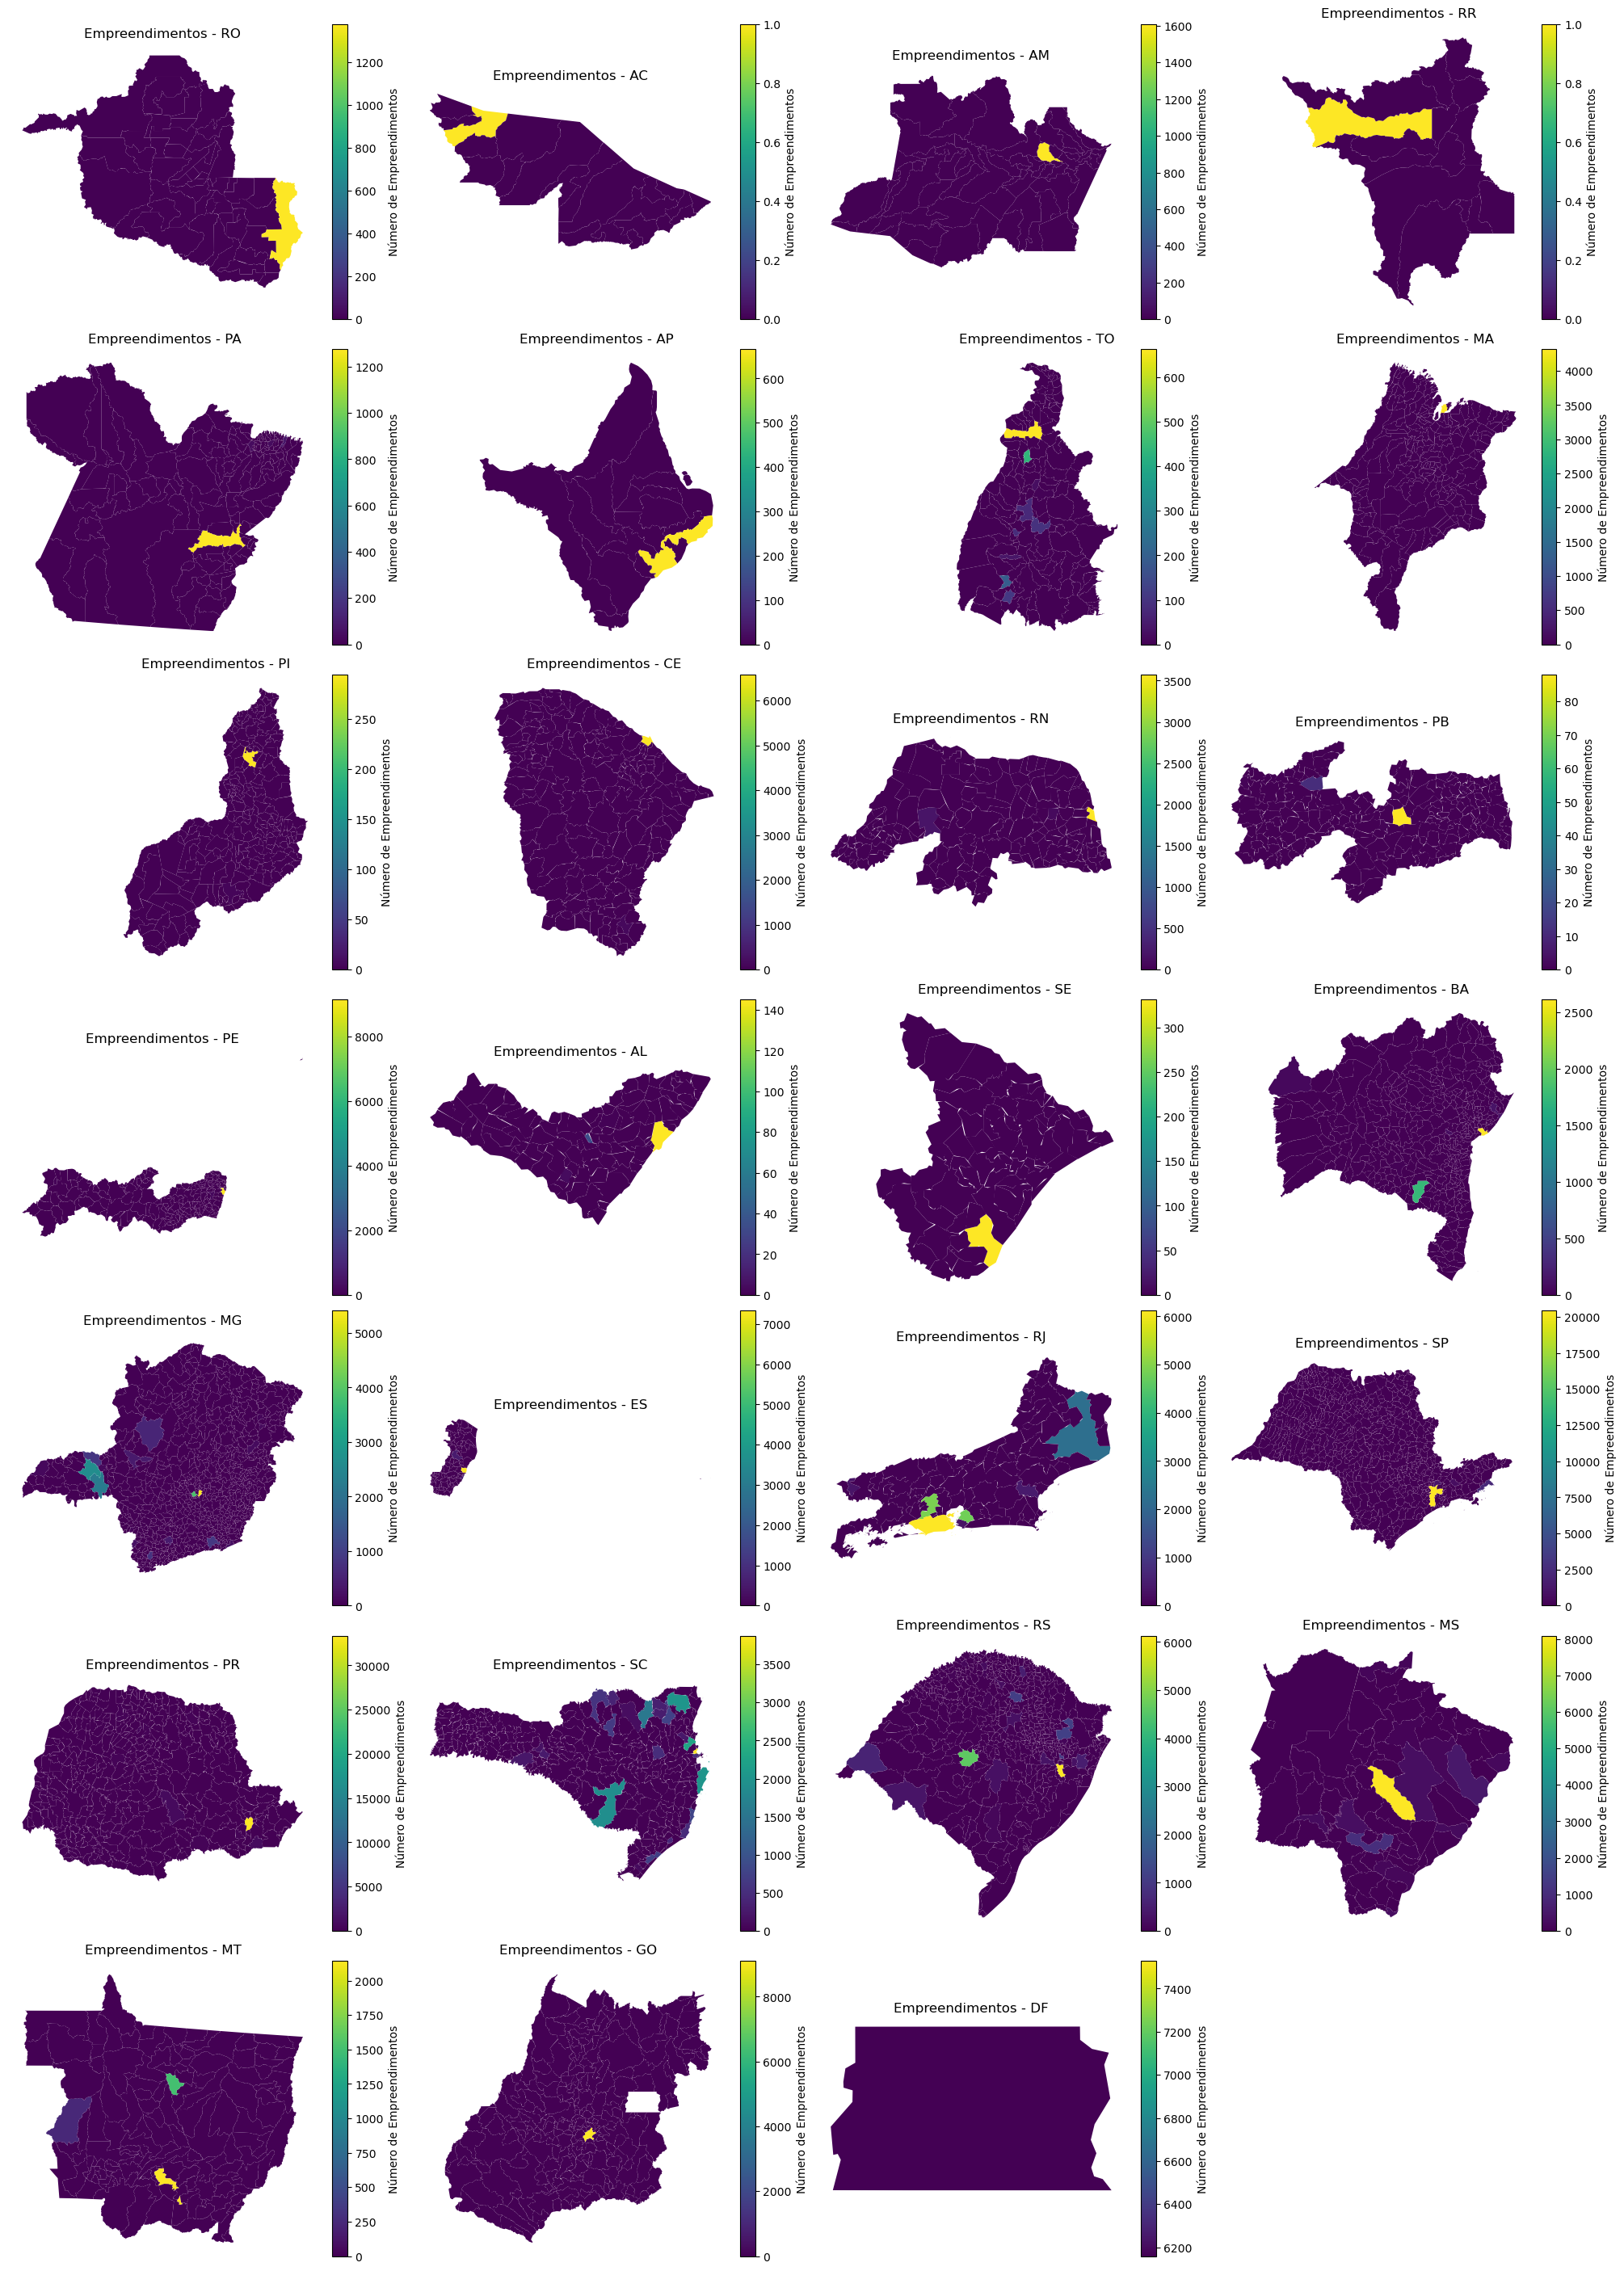

In [48]:
# Preparar layout de subplots
n_cols = 4  # Número de colunas na grade
n_rows = (len(estados) + n_cols - 1) // n_cols

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4 * n_rows), constrained_layout=True)

# Garantir que axs seja uma lista de listas para facilitar a indexação
if n_rows == 1 or n_cols == 1:
    axs = axs.reshape(n_rows, n_cols)

for ax, estado in zip(axs.flat, estados):
    # Filtrar dados para o estado atual
    gdf_estado = gdf_grouped[gdf_grouped['SIGLA_UF'] == estado]

    # Plotar a densidade de empreendimentos por município
    gdf_estado.plot(ax=ax, column='Numero_Empreendimentos', legend=True,
                    cmap='viridis', legend_kwds={'label': "Número de Empreendimentos"})
    
    ax.set_title(f'Empreendimentos - {estado}')
    ax.axis('off')  # Esconder os eixos

# Esconder subplots extras se houver
for ax in axs.flat[len(estados):]:
    ax.set_visible(False)

plt.show()

# Mapa por tipo de empreendimento

In [93]:
gdf_empreendimentos

Unnamed: 0   cod_mdr  cod_operacao  cod_saci  cod_convenio_siafi  \
0               0   1-38001      319910.0   38001.0                 0.0   
1               1   1-38002      319912.0   38002.0                 0.0   
2               2   1-38003      319914.0   38003.0                 0.0   
3               3   1-38004      354485.0   38004.0                 0.0   
4               4   1-38005      345051.0   38005.0                 0.0   
...           ...       ...           ...       ...                 ...   
71243       71243  4-603771      603795.0       0.0                 0.0   
71244       71244  4-603772      603796.0       0.0                 0.0   
71245       71245  4-603787      603794.0       0.0                 0.0   
71246       71246  4-603797      603798.0       0.0                 0.0   
71247       71247  4-603818      603847.0       0.0                 0.0   

       cod_ag_operador     origem          dsc_concedente dsc_fonte  \
0             375658.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
1             375664.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
2             375666.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
3                  NaN   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
4             377438.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
...                ...        ...                     ...       ...   
71243         603771.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71244         603772.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71245         603787.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71246         603797.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71247         603818.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   

       dsc_unidade cod_proposta dsc_situacao_contrato_mdr bln_carteira_mdr  \
0            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
1            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
2            SEMOB          NaN       CONTRATADO - NORMAL              SIM   
3            SEMOB          NaN            EM CONTRATACAO              NAO   
4            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
...            ...          ...                       ...              ...   
71243  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71244  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71245  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71246  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71247  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   

      bln_carteira_mdr_ativo dsc_situacao_objeto_mdr  \
0                        NAO               CONCLUIDA   
1                        NAO               CONCLUIDA   
2                        SIM             EM EXECUCAO   
3                        NAO            NAO INICIADA   
4                        NAO               CONCLUIDA   
...                      ...                     ...   
71243                    NAO               CONCLUIDA   
71244                    NAO               CONCLUIDA   
71245                    NAO               CONCLUIDA   
71246                    NAO               CONCLUIDA   
71247                    NAO               CONCLUIDA   

                            dsc_paralisada_mdr bln_ativo bln_ativo_boolean  \
0                               NAO PARALISADA         S                 Y   
1                               NAO PARALISADA         S                 Y   
2      PARALISADA - 90 DIAS SEM MOV FINANCEIRA         S                 Y   
3                               NAO PARALISADA         N                 N   
4                               NAO PARALISADA         S                 Y   
...                                        ...       ...               ...   
71243                           NAO PARALISADA         S                 Y   
71244              

In [125]:
# Calcular a contagem de cada tipo de empreendimento por estado
counts = gdf_empreendimentos.groupby(['uf_SIGLA_UF', 'Categoria_emprendimentos']).size().reset_index(name='count')

# Calcular o total de empreendimentos por estado
total_counts = counts.groupby('uf_SIGLA_UF')['count'].transform(sum)

# Clacular o percentual diretamente
counts['percentual'] = (counts['count'] / total_counts) 

# Agora, o merge é feito para adicionar os percentuais ao DataFrame original
gdf_empreendimentos = gdf_empreendimentos.merge(counts[['uf_SIGLA_UF', 'Categoria_emprendimentos', 'percentual']], on=['uf_SIGLA_UF', 'Categoria_emprendimentos'], how='left')

In [133]:
gdf_empreendimentos = gdf_empreendimentos.dropna(subset=['latitude'])
# Remover pontos vazios antes de plotar
gdf_empreendimentos = gdf_empreendimentos[gdf_empreendimentos['geometry'].notna()]
gdf_empreendimentos

Unnamed: 0   cod_mdr  cod_operacao  cod_saci  cod_convenio_siafi  \
0               0   1-38001      319910.0   38001.0                 0.0   
1               1   1-38002      319912.0   38002.0                 0.0   
2               2   1-38003      319914.0   38003.0                 0.0   
6               6   1-38007      345054.0   38007.0                 0.0   
8               8   1-38009      319124.0   38009.0                 0.0   
...           ...       ...           ...       ...                 ...   
71243       71243  4-603771      603795.0       0.0                 0.0   
71244       71244  4-603772      603796.0       0.0                 0.0   
71245       71245  4-603787      603794.0       0.0                 0.0   
71246       71246  4-603797      603798.0       0.0                 0.0   
71247       71247  4-603818      603847.0       0.0                 0.0   

       cod_ag_operador     origem          dsc_concedente dsc_fonte  \
0             375658.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
1             375664.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
2             375666.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
6             379536.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
8             342637.0   PAC_MCID  MINISTERIO DAS CIDADES       FIN   
...                ...        ...                     ...       ...   
71243         603771.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71244         603772.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71245         603787.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71246         603797.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   
71247         603818.0  NPAC_FGTS  MINISTERIO DAS CIDADES       FIN   

       dsc_unidade cod_proposta dsc_situacao_contrato_mdr bln_carteira_mdr  \
0            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
1            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
2            SEMOB          NaN       CONTRATADO - NORMAL              SIM   
6            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
8            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
...            ...          ...                       ...              ...   
71243  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71244  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71245  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71246  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
71247  SMDRU-DEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   

      bln_carteira_mdr_ativo dsc_situacao_objeto_mdr  \
0                        NAO               CONCLUIDA   
1                        NAO               CONCLUIDA   
2                        SIM             EM EXECUCAO   
6                        NAO               CONCLUIDA   
8                        NAO               CONCLUIDA   
...                      ...                     ...   
71243                    NAO               CONCLUIDA   
71244                    NAO               CONCLUIDA   
71245                    NAO               CONCLUIDA   
71246                    NAO               CONCLUIDA   
71247                    NAO               CONCLUIDA   

                            dsc_paralisada_mdr bln_ativo bln_ativo_boolean  \
0                               NAO PARALISADA         S                 Y   
1                               NAO PARALISADA         S                 Y   
2      PARALISADA - 90 DIAS SEM MOV FINANCEIRA         S                 Y   
6                               NAO PARALISADA         S                 Y   
8                               NAO PARALISADA         S                 Y   
...                                        ...       ...               ...   
71243                           NAO PARALISADA         S                 Y   
71244              

  CD_UF      NM_UF SIGLA_UF NM_REGIAO     AREA_KM2  \
0    12       Acre       AC     Norte   164173.429   
1    13   Amazonas       AM     Norte  1559255.881   
2    15       Pará       PA     Norte  1245870.704   
3    16      Amapá       AP     Norte   142470.762   
4    17  Tocantins       TO     Norte   277423.627   

                                            geometry  
0  POLYGON ((-68.79282 -10.99957, -68.79367 -10.9...  
1  POLYGON ((-56.76292 -3.23221, -56.76789 -3.242...  
2  MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...  
3  MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...  
4  POLYGON ((-48.24830 -13.19239, -48.24844 -13.1...  


<Axes: >

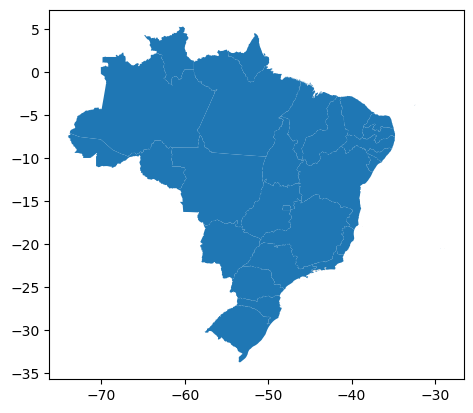

In [128]:
#carregando a base de municípios baixados no site do IBGE
shapefile_path = '..\\shp\\estados\\BR_UF_2022.shp'
gdf_estados = gpd.read_file(shapefile_path)

# Visualizar os dados
print(gdf_estados.head())
gdf_estados.plot()

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


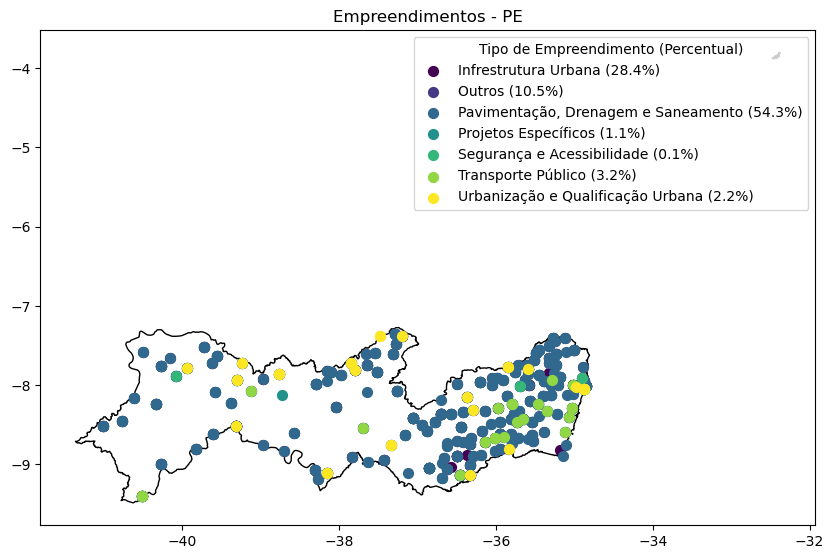

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


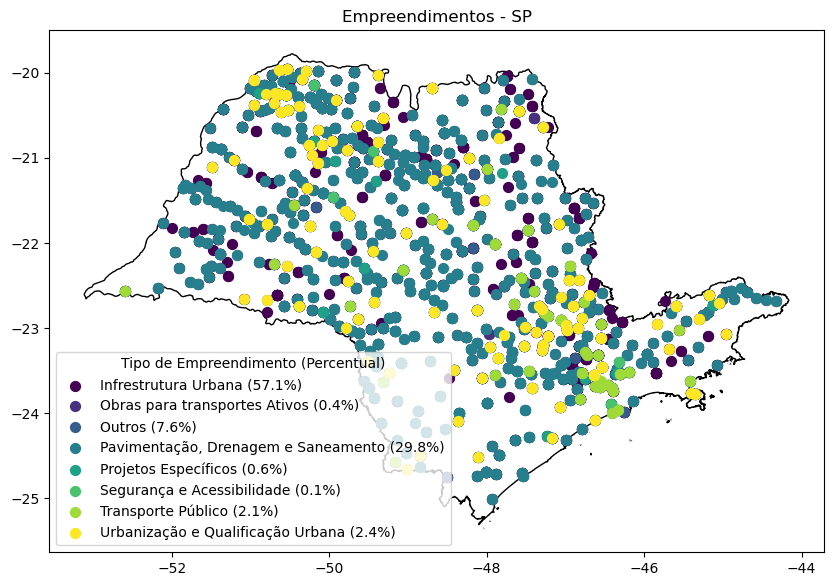

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


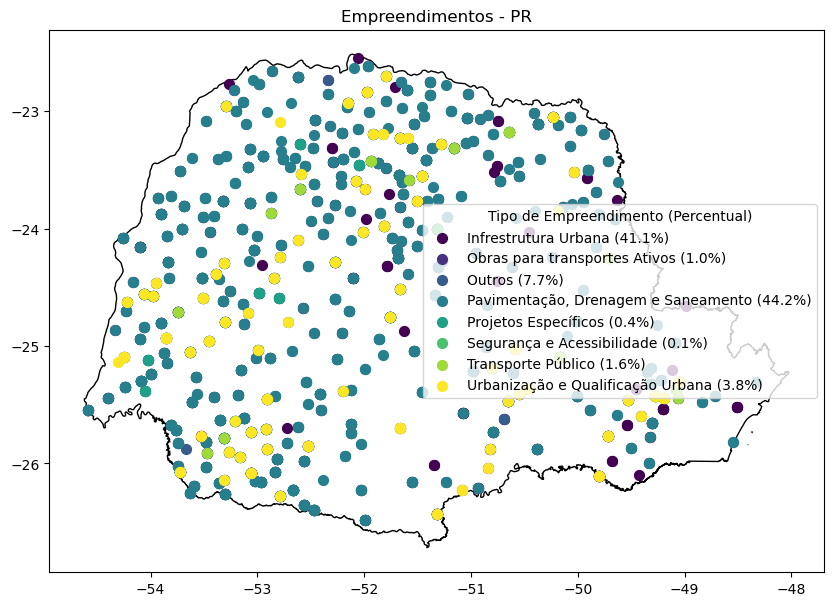

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


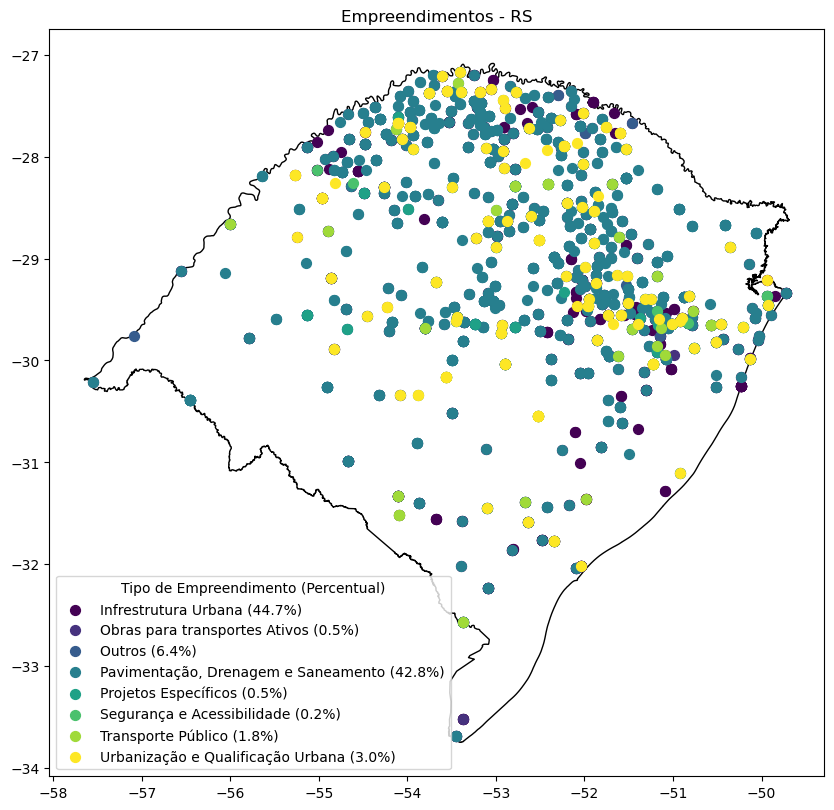

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


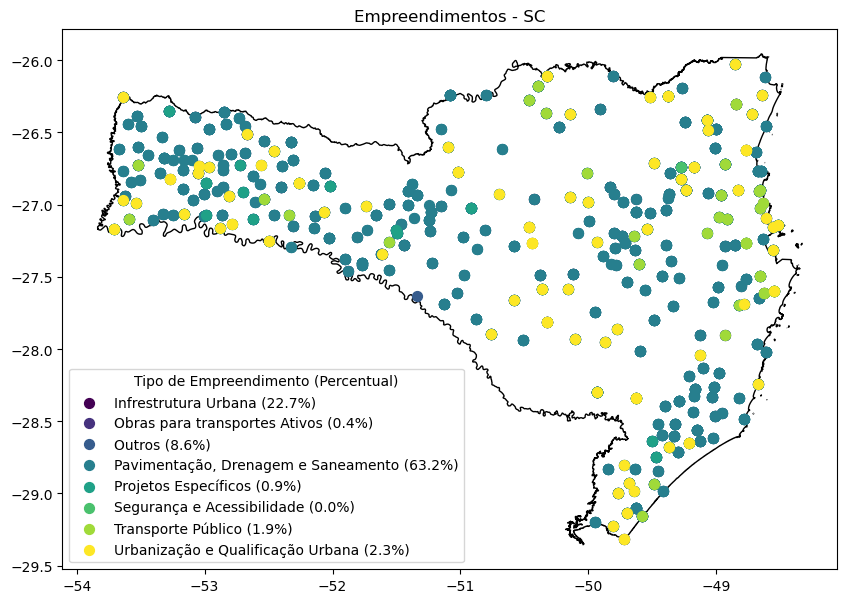

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


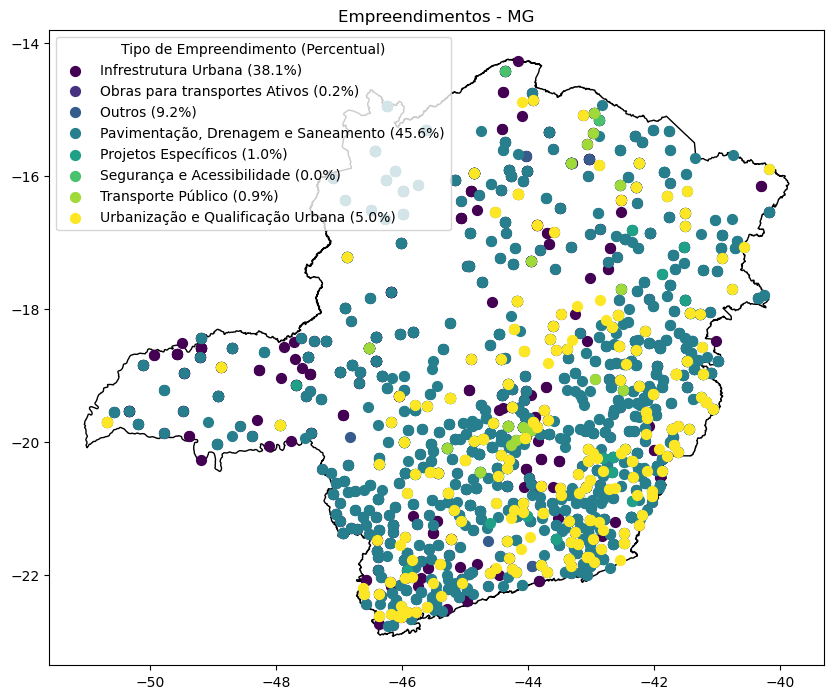

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


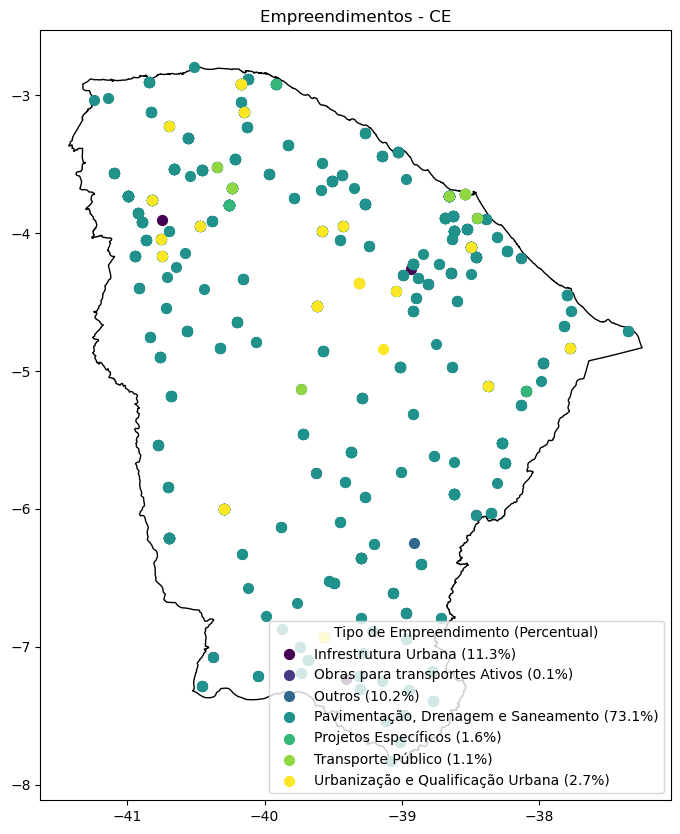

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


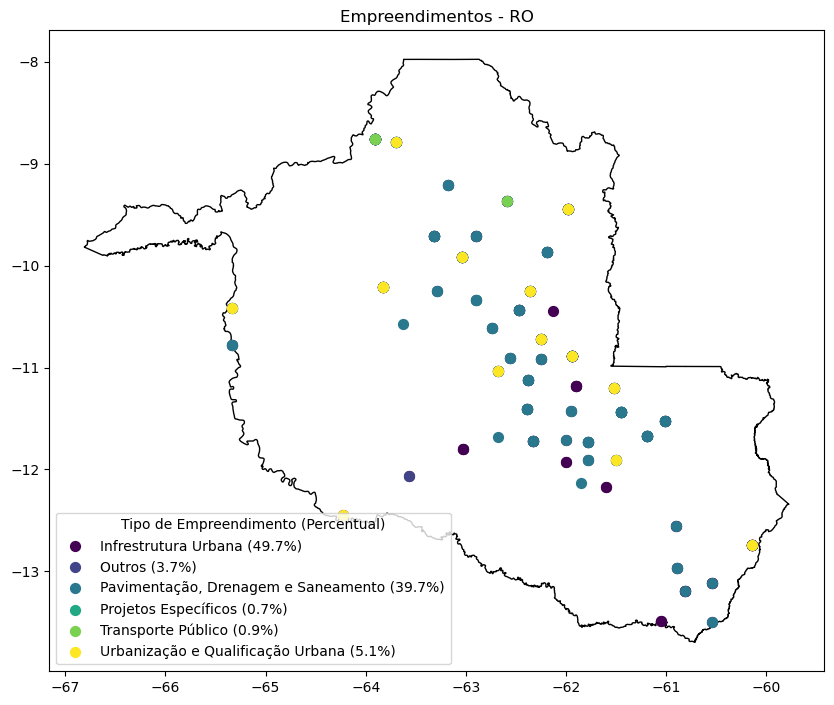

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


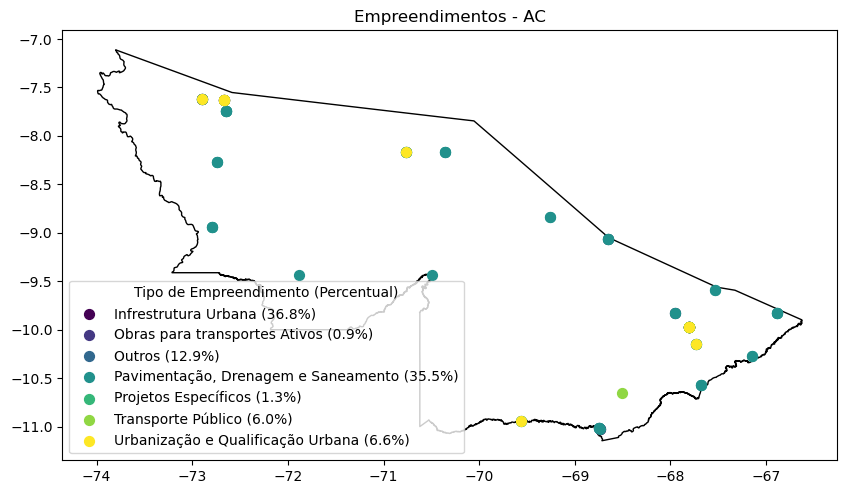

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


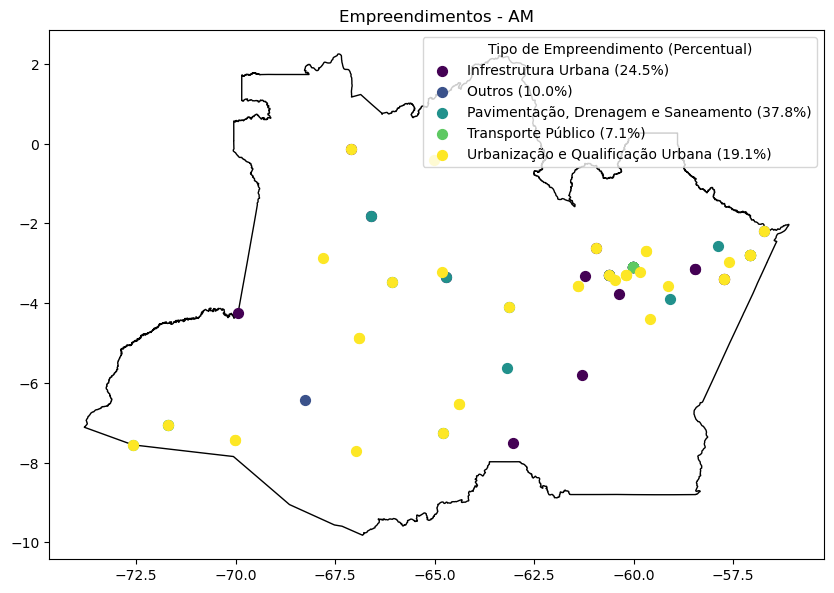

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


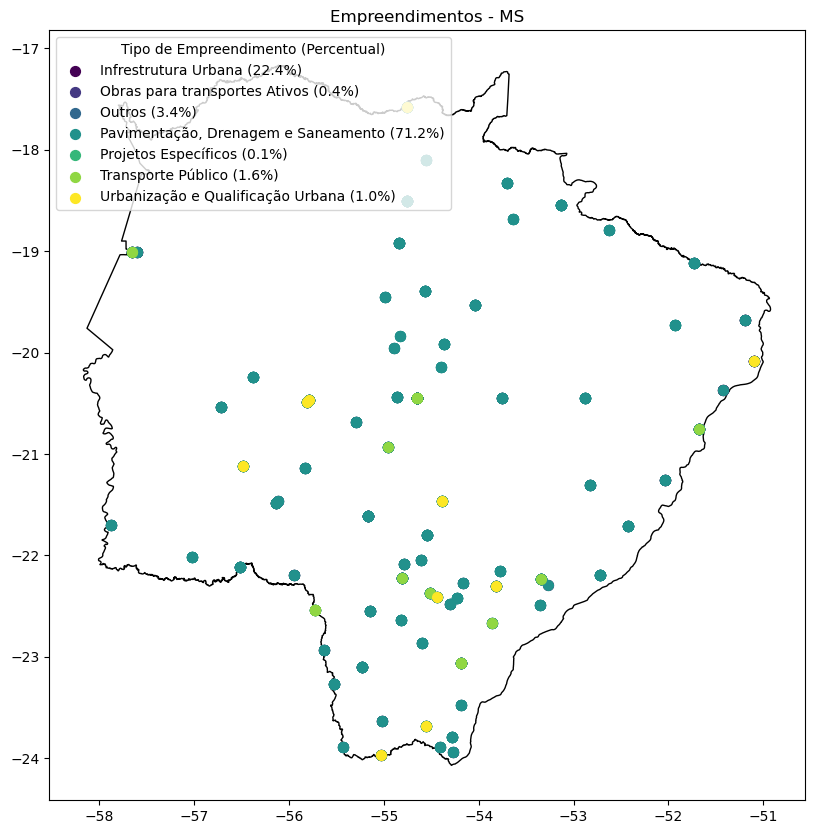

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


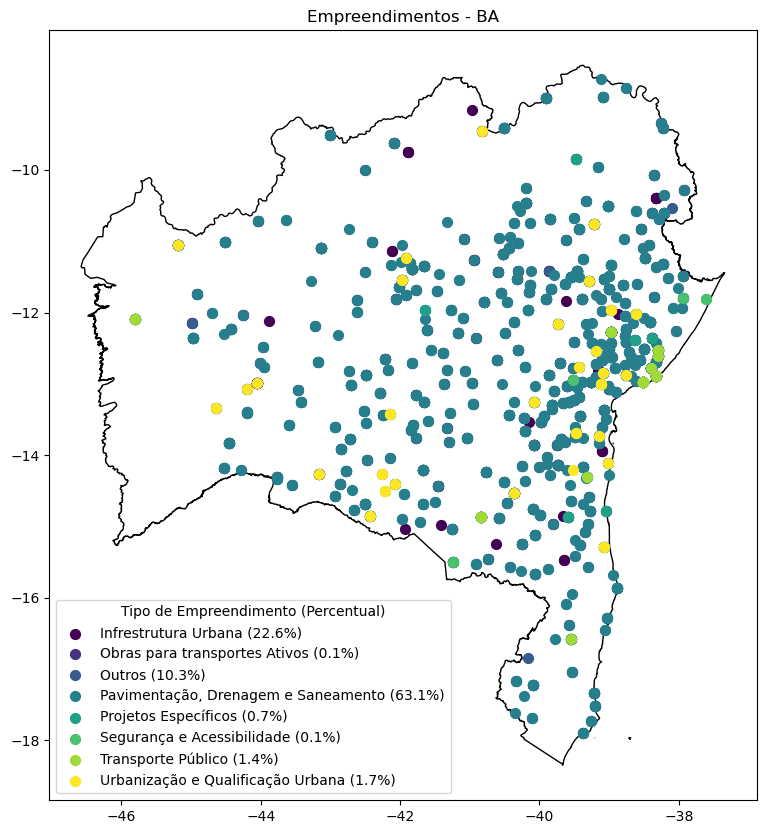

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


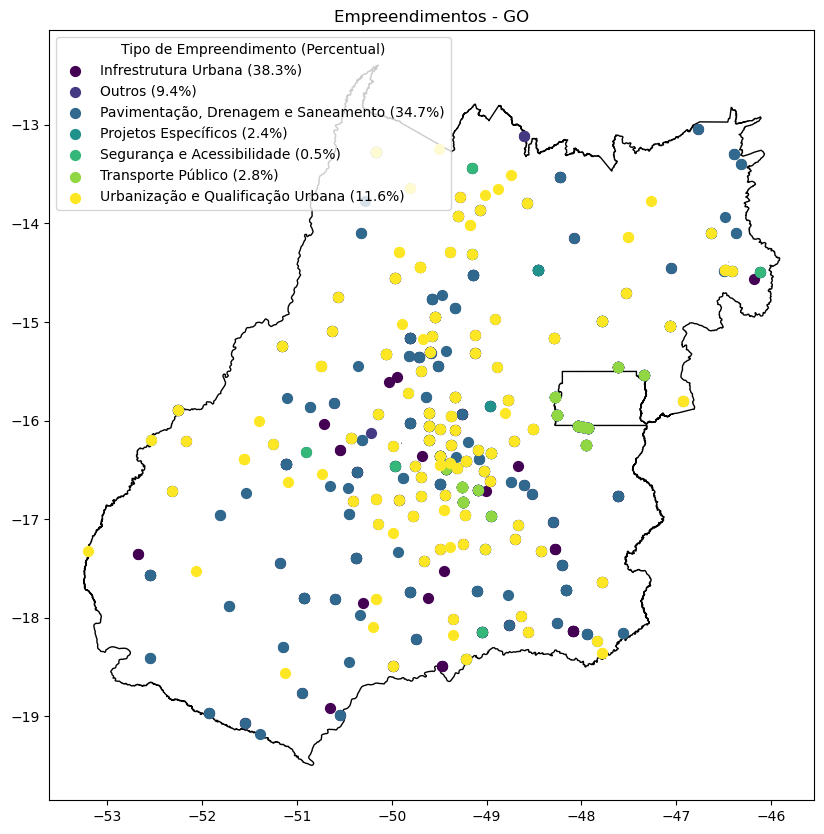

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


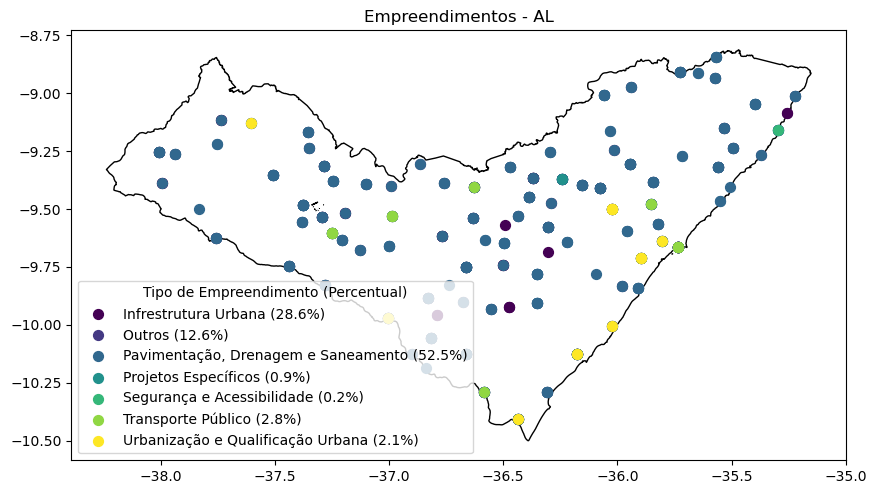

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


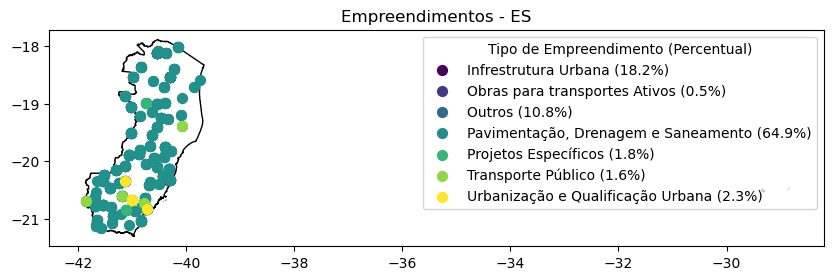

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


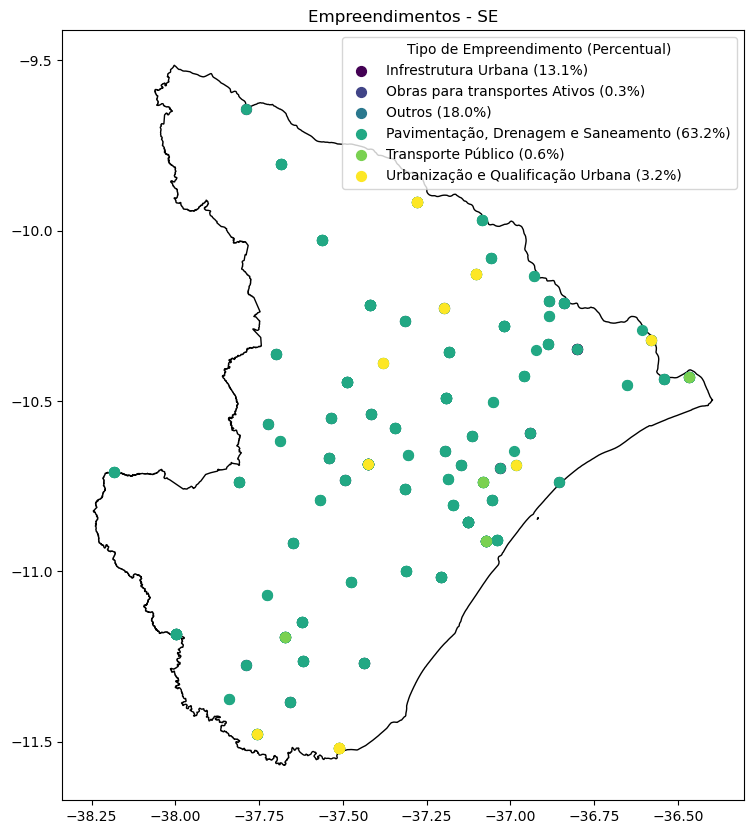

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


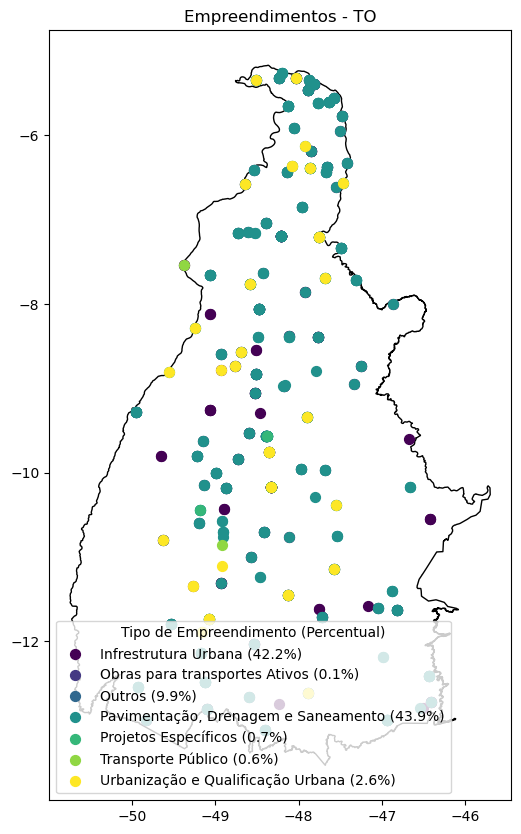

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


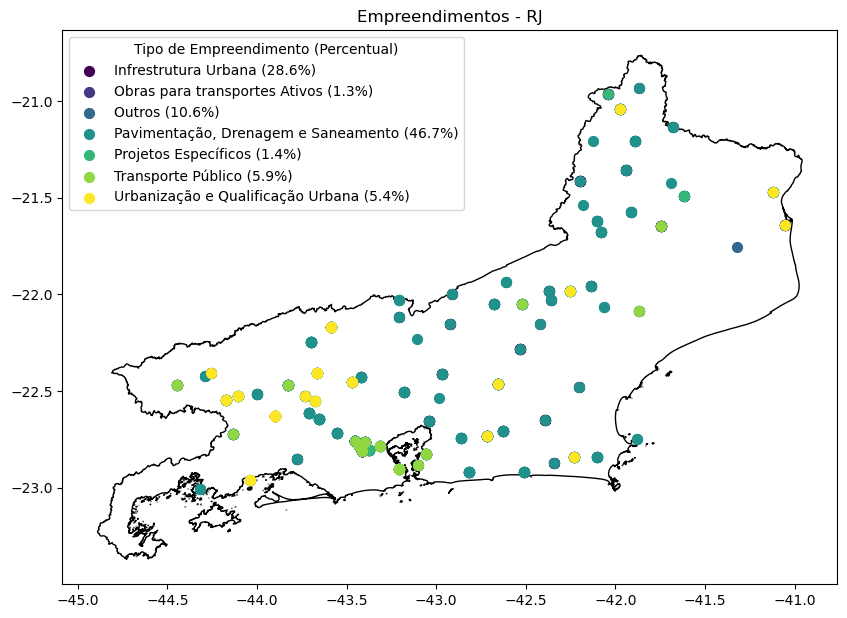

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


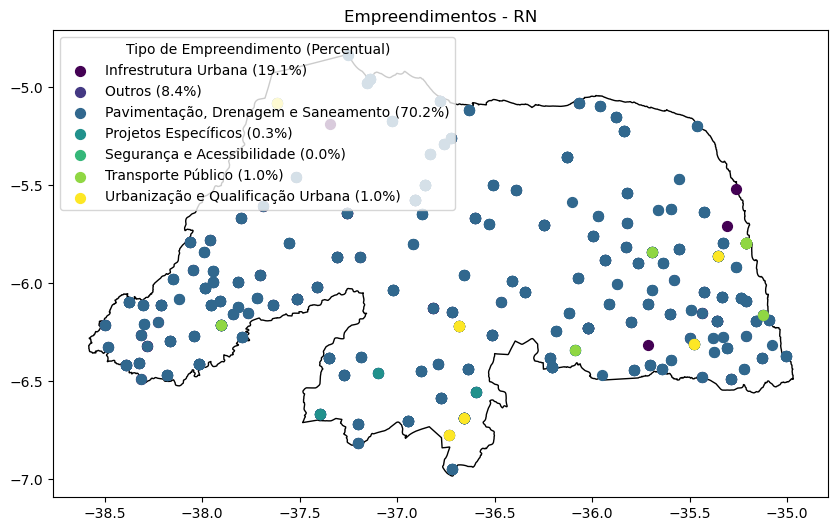

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


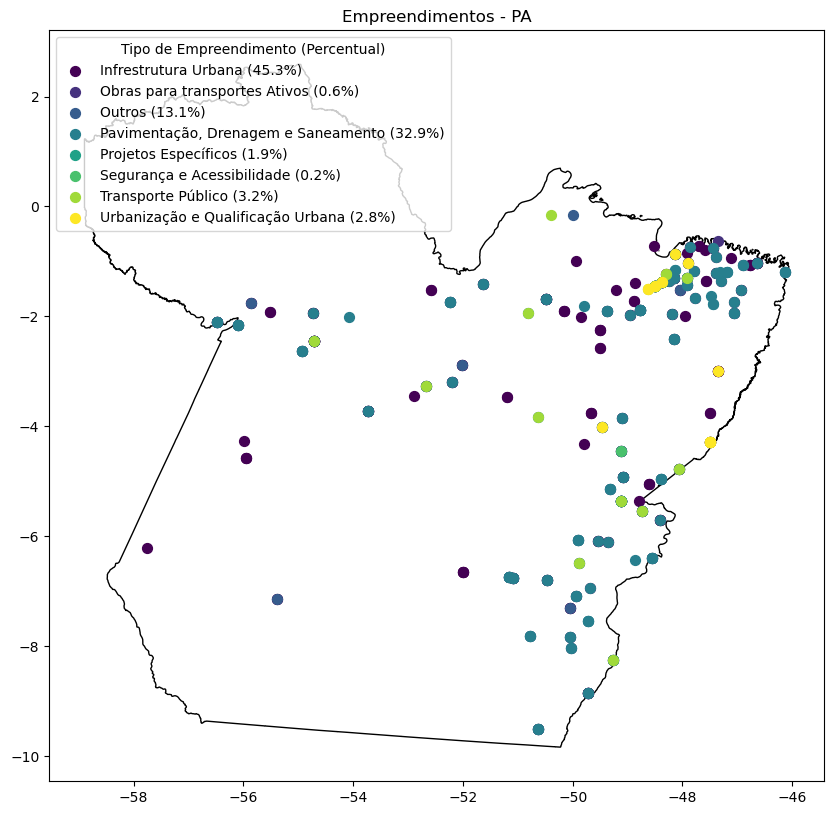

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


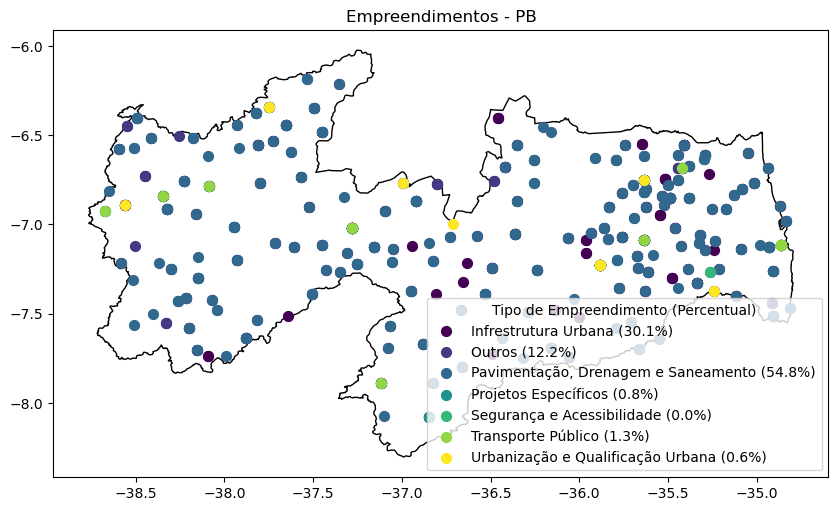

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


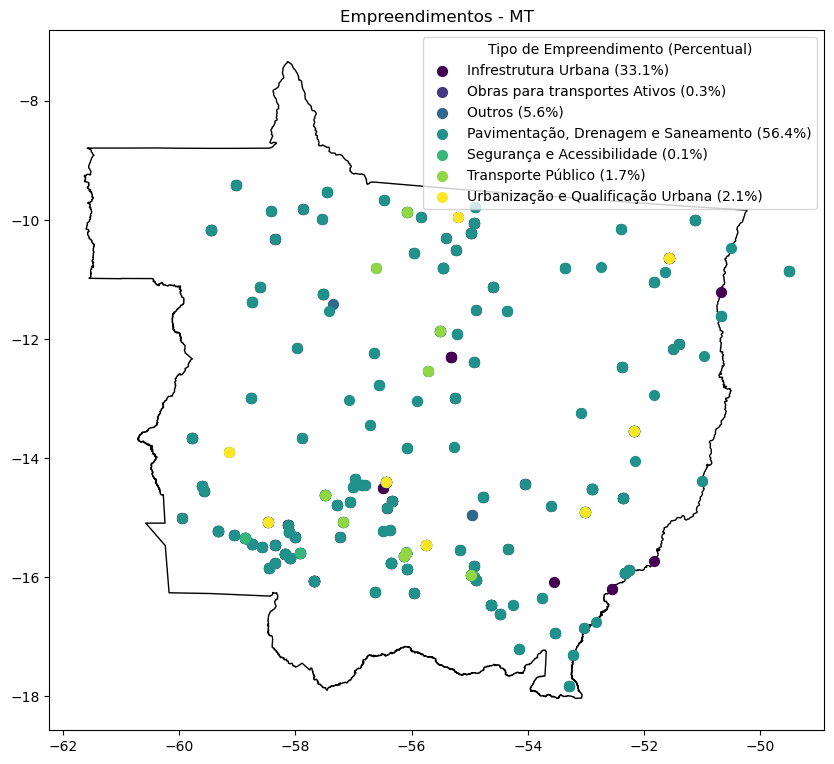

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


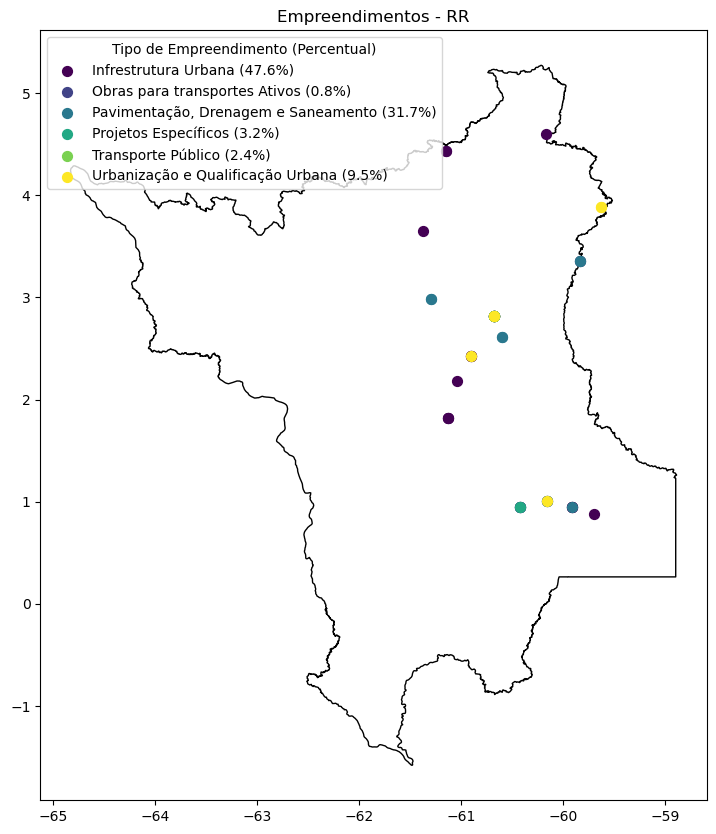

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


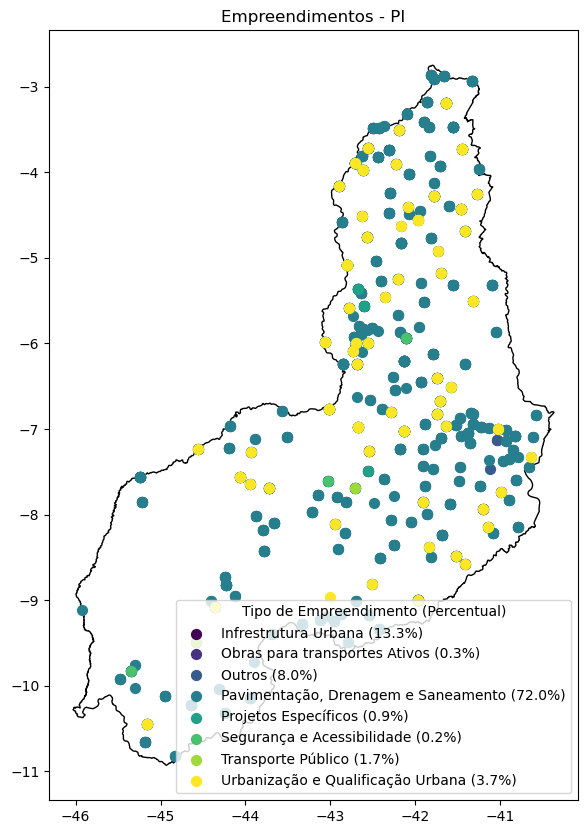

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


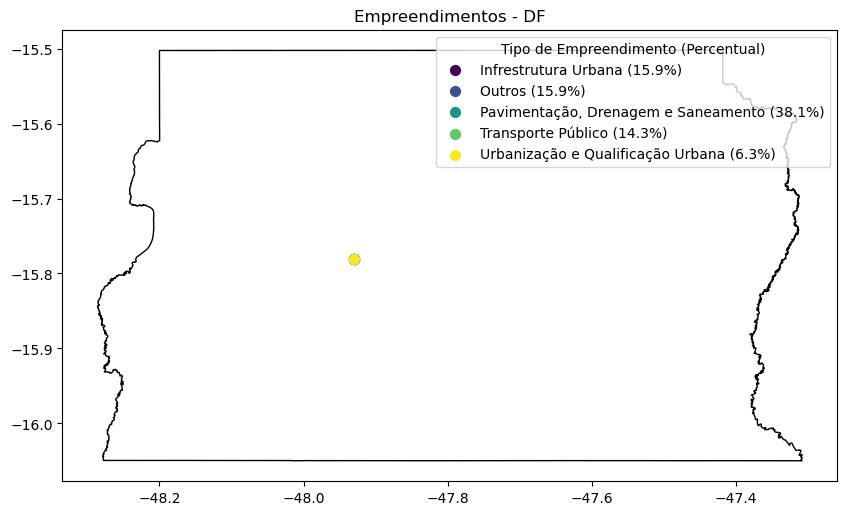

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


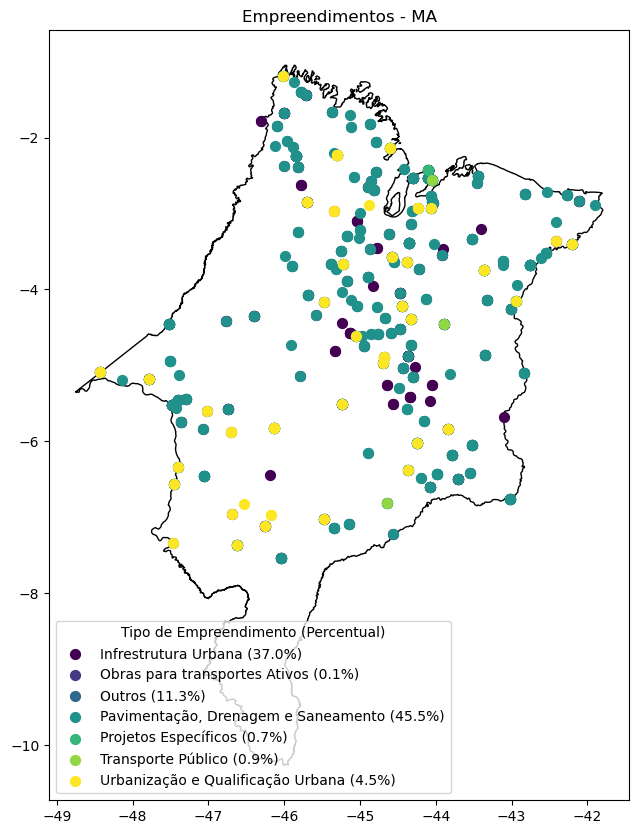

C:\Users\kaiog\AppData\Local\Temp\ipykernel_30692\999563917.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(legend_labels))


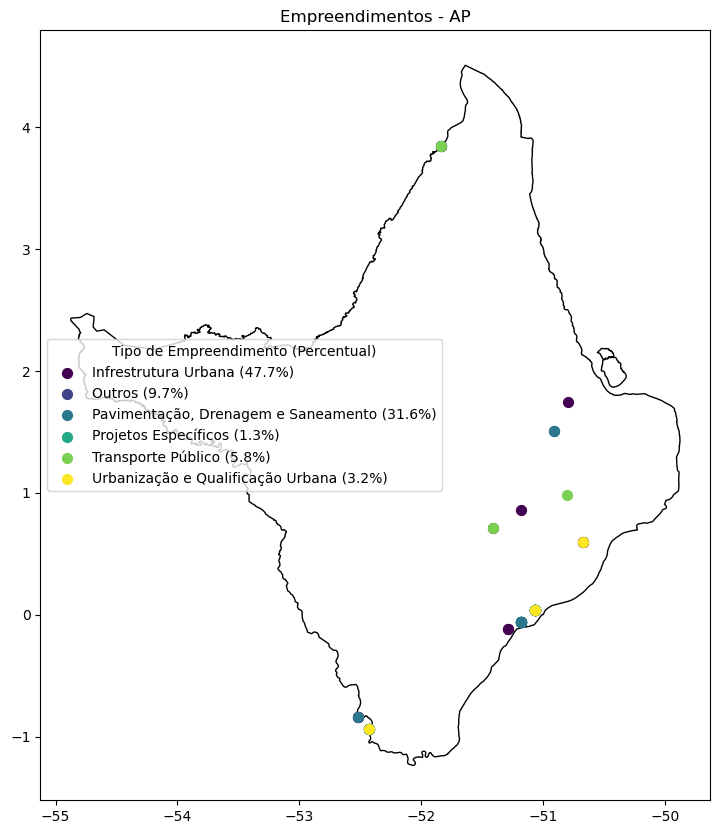

In [137]:
# Plotar cada estado com empreendimentos
for estado in gdf_empreendimentos['uf_SIGLA_UF'].unique():
    fig, ax = plt.subplots(figsize=(10, 10))
    # Filtrar os empreendimentos por estado
    empreendimentos_estado = gdf_empreendimentos[gdf_empreendimentos['uf_SIGLA_UF'] == estado]

    # Plotar o contorno do estado
    gdf_estados[gdf_estados['SIGLA_UF'] == estado].plot(ax=ax, color='none', edgecolor='black')
    ax.set_title(f"Empreendimentos - {estado}")

    # Preparar dados para a legenda
    # Agrupar por tipo e calcular percentuais para a legenda
    legend_labels = empreendimentos_estado.groupby('Categoria_emprendimentos')['percentual_x'].mean()

    # Criar um mapeamento de cores para cada tipo de empreendimento
    colormap = plt.cm.get_cmap('viridis', len(legend_labels))

    # Plotar empreendimentos como pontos coloridos por tipo
    for (tipo, percentual), color in zip(legend_labels.items(), colormap.colors):
        empreendimentos_tipo = empreendimentos_estado[empreendimentos_estado['Categoria_emprendimentos'] == tipo]
        empreendimentos_tipo.plot(ax=ax, markersize=50, color=color, label=f'{tipo} ({percentual:.1f}%)')

    # Adicionar legenda com percentuais
    ax.legend(title='Tipo de Empreendimento (Percentual)')

    plt.show()